In [342]:
# Import Libraries
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import io
from numpy import median, mean ,sum

#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE 

from keras import layers



In [2]:
#Read the csv file with utf-8 decoding
dfcolraw = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/Colonoscopyrecords.csv')
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID
0,1,69,19/03/2013,M,19
1,2,69,12/03/2013,F,19
2,3,69,05/03/2013,F,19
3,4,69,12/03/2013,M,19
4,5,69,12/03/2013,M,19


In [3]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41391 entries, 0 to 41390
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             41391 non-null  int64 
 1   Age            41391 non-null  int64 
 2   proceduredate  41391 non-null  object
 3   Gender         41391 non-null  object
 4   CLINICID       41391 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [4]:
dfcolraw.shape

(41391, 5)

In [5]:
dfcolavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()


In [6]:
dfcolavg=pd.DataFrame(dfcolavg)

In [7]:
dfcolavg

ID
Age proceduredate    
53  25/07/2018      1
57  29/04/2015      1
58  07/02/2018      1
59  02/03/2017      1
    09/07/2018      1
...                ..
79  29/01/2023      2
80  02/03/2023      1
    12/07/2023      1
    14/12/2022      1
    15/05/2023      1

[21268 rows x 1 columns]

In [8]:
dfcolage=dfcolraw.groupby(['Age'])['ID'].count()

In [9]:
dfcolage.shape

(25,)

In [10]:
dfcolage.describe()

count      25.000000
mean     1655.640000
std      1684.220168
min         1.000000
25%        62.000000
50%       927.000000
75%      3160.000000
max      4915.000000
Name: ID, dtype: float64

In [11]:
dfcolage=pd.DataFrame(dfcolage).reset_index()

In [12]:
dfcolage

,Age,ID
0,53,1
1,57,1
2,58,1
3,59,4
4,60,3160
5,61,1716
6,62,2571
7,63,3281
8,64,3121
9,65,3386


In [13]:
dfcolraw.shape

(41391, 5)

In [14]:
dfcolraw['proceduredate']=pd.to_datetime(dfcolraw['proceduredate'])
dfcolraw['proceduredate'] =pd.to_datetime(dfcolraw['proceduredate'].dt.strftime('%d/%m/%Y'))


In [15]:
#Create a new column in dataframe that has the value of date and month combination
dfcolraw['day'] = [x.day for x in dfcolraw['proceduredate']]
dfcolraw['month'] = [x.month for x in dfcolraw['proceduredate']]
dfcolraw['year'] = [x.year for x in dfcolraw['proceduredate']]

# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year
0,1,69,2013-03-19,M,19,19,3,2013
1,2,69,2013-03-12,F,19,12,3,2013
2,3,69,2013-03-05,F,19,5,3,2013
3,4,69,2013-03-12,M,19,12,3,2013
4,5,69,2013-03-12,M,19,12,3,2013


In [16]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolraw['Monthname'] = dfcolraw['month'].map(monthsmap)
# Display first five records
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar


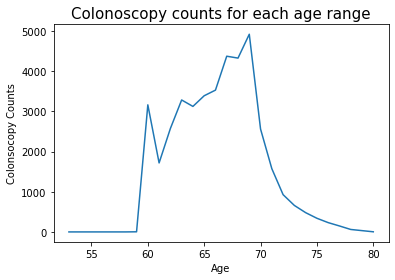

In [17]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = dfcolage['Age']
y = dfcolage['ID']

plt.plot(x, y) # Plot the chart
plt.xlabel('Age')
plt.ylabel('Colonsocopy Counts')
plt.title('Colonoscopy counts for each age range', fontsize=15)

plt.show() # display

In [18]:
#Create dataframe for each date
dfcoldate=dfcolraw.groupby(['proceduredate'])['ID'].agg(["count"]).reset_index()

In [19]:
dfcoldate

,proceduredate,count
0,2012-12-03,1
1,2013-02-20,3
2,2013-02-25,1
3,2013-03-01,3
4,2013-03-04,3
...,...,...
2693,2023-07-06,28
2694,2023-07-07,9
2695,2023-07-10,23
2696,2023-07-11,14


In [20]:
#Create dataframe for each Unit
dfcolclinic=dfcolraw.groupby(['CLINICID','Age'])['ID'].agg(["count"]).reset_index()

In [21]:
dfcolclinic

,CLINICID,Age,count
0,1,60,477
1,1,61,226
2,1,62,285
3,1,63,512
4,1,64,400
...,...,...,...
319,24,76,11
320,24,77,9
321,24,78,1
322,24,79,5


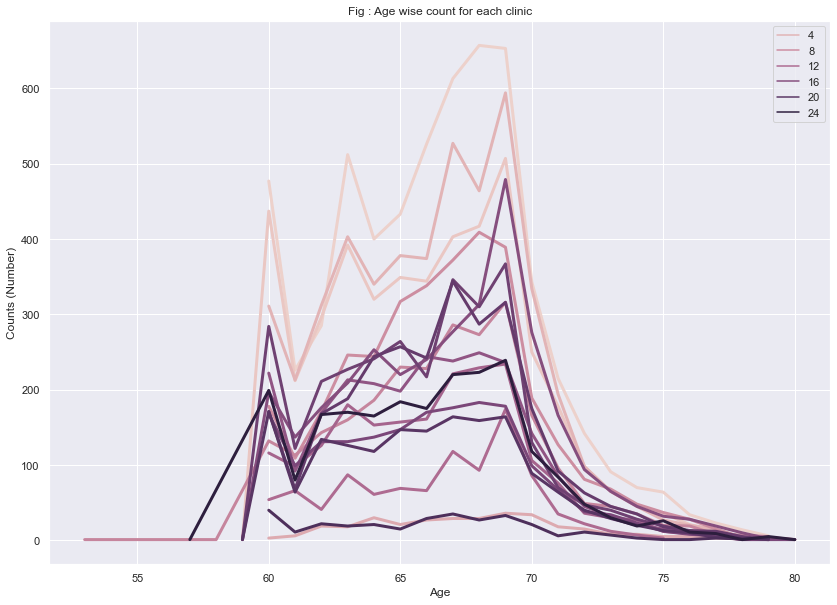

In [22]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolclinic, x ='Age', y = 'count',
                  hue='CLINICID', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

In [23]:
#Create dataframe for each Unit
dfcolagegender=dfcolraw.groupby(['Age','Gender'])['ID'].agg(["count"]).reset_index()

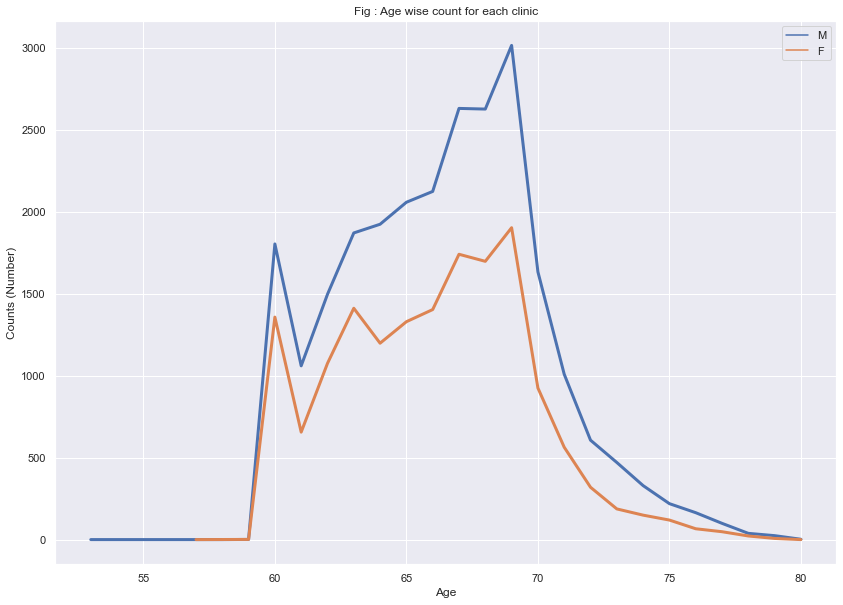

In [24]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcolagegender, x ='Age', y = 'count',
                  hue='Gender', lw=3) # Draw the plot

plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot

Text(0.5, 1.0, 'Box plot Administration')

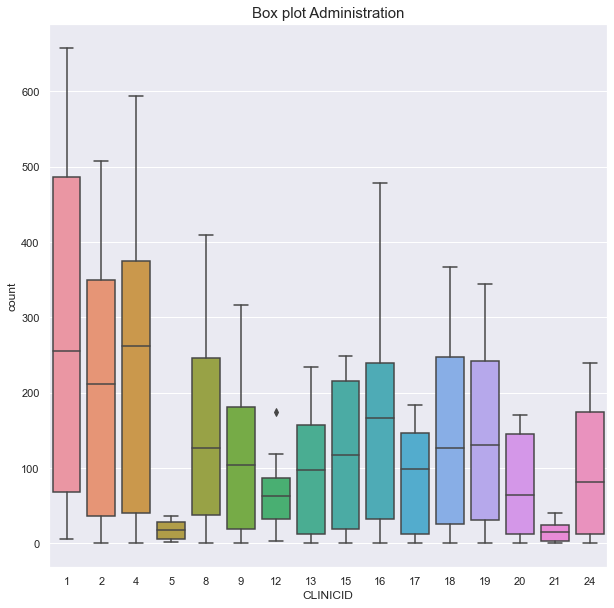

In [25]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

Text(0.5, 1.0, 'Box plot Administration')

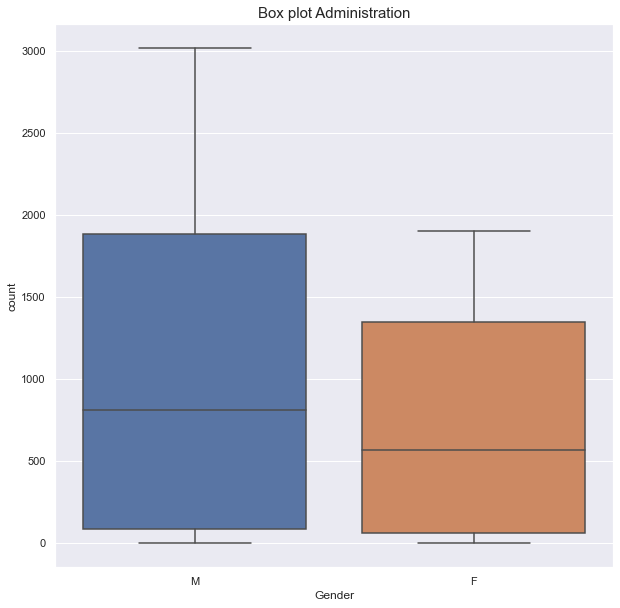

In [26]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'Gender', y ='count', data=dfcolagegender)
plt.title('Box plot Administration', fontsize=15)

Text(0.5, 1.0, 'Box plot Administration')

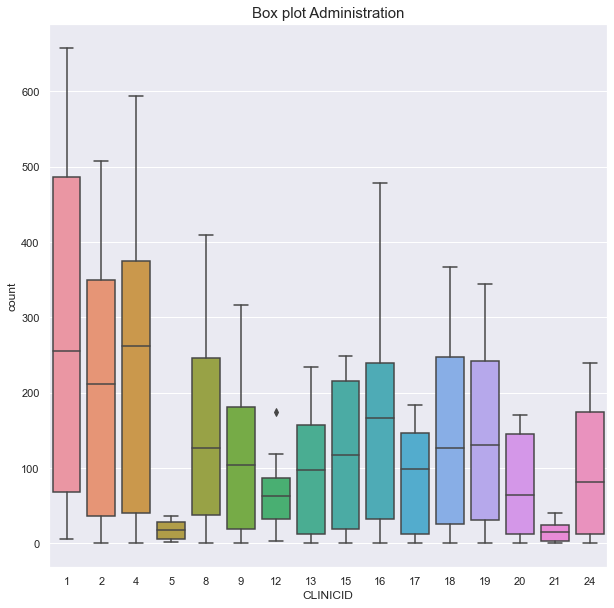

In [27]:
#Show outliers in the heatmap

plt.figure(figsize=(10,10))
sns.boxplot(x = 'CLINICID', y ='count', data=dfcolclinic)
plt.title('Box plot Administration', fontsize=15)

In [28]:
#Create dataframe for each Unit
dfcolclinicpd=dfcolraw.groupby(['CLINICID','Age','proceduredate','Gender'])['ID'].agg(["count"]).reset_index()
dfcolclinicpd

,CLINICID,Age,proceduredate,Gender,count
0,1,60,2016-06-21,M,1
1,1,60,2016-07-12,M,1
2,1,60,2016-07-26,M,1
3,1,60,2016-08-09,M,1
4,1,60,2016-08-16,M,1
...,...,...,...,...,...
38000,24,79,2023-02-11,F,1
38001,24,79,2023-02-11,M,1
38002,24,79,2023-06-14,M,1
38003,24,79,2023-06-28,F,1


In [29]:
dfcolclinicpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38005 entries, 0 to 38004
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CLINICID       38005 non-null  int64         
 1   Age            38005 non-null  int64         
 2   proceduredate  38005 non-null  datetime64[ns]
 3   Gender         38005 non-null  object        
 4   count          38005 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.4+ MB


In [30]:
dfcolclinicpd['proceduredate']=pd.to_datetime(dfcolclinicpd['proceduredate'])
dfcolclinicpd['proceduredate'] =pd.to_datetime(dfcolclinicpd['proceduredate'].dt.strftime('%d/%m/%Y'))


In [31]:
#Create a new column in dataframe that has the value of date and month combination
dfcolclinicpd['day'] = [x.day for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['month'] = [x.month for x in dfcolclinicpd['proceduredate']]
dfcolclinicpd['year'] = [x.year for x in dfcolclinicpd['proceduredate']]

# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year
0,1,60,2016-06-21,M,1,21,6,2016
1,1,60,2016-12-07,M,1,7,12,2016
2,1,60,2016-07-26,M,1,26,7,2016
3,1,60,2016-09-08,M,1,8,9,2016
4,1,60,2016-08-16,M,1,16,8,2016


In [32]:
monthsmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dfcolclinicpd['Monthname'] = dfcolclinicpd['month'].map(monthsmap)
# Display first five records
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


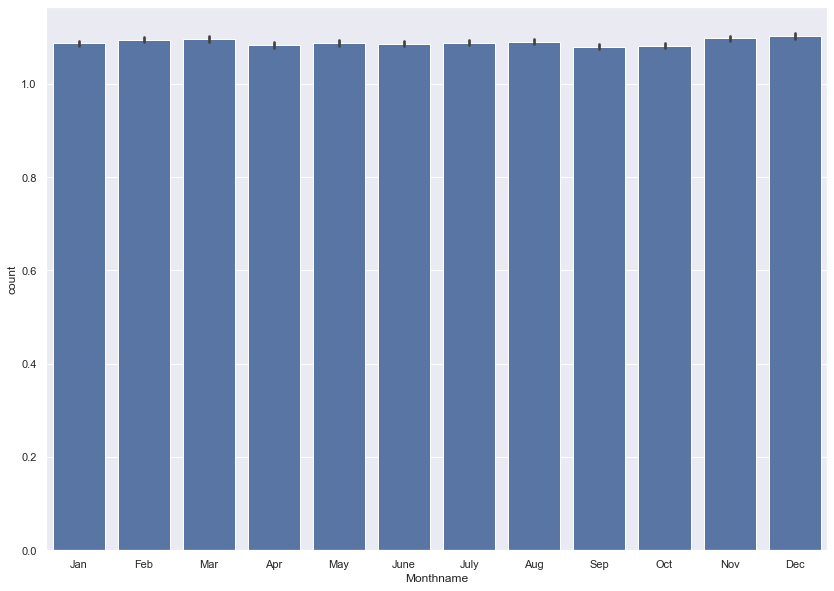

In [33]:
ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

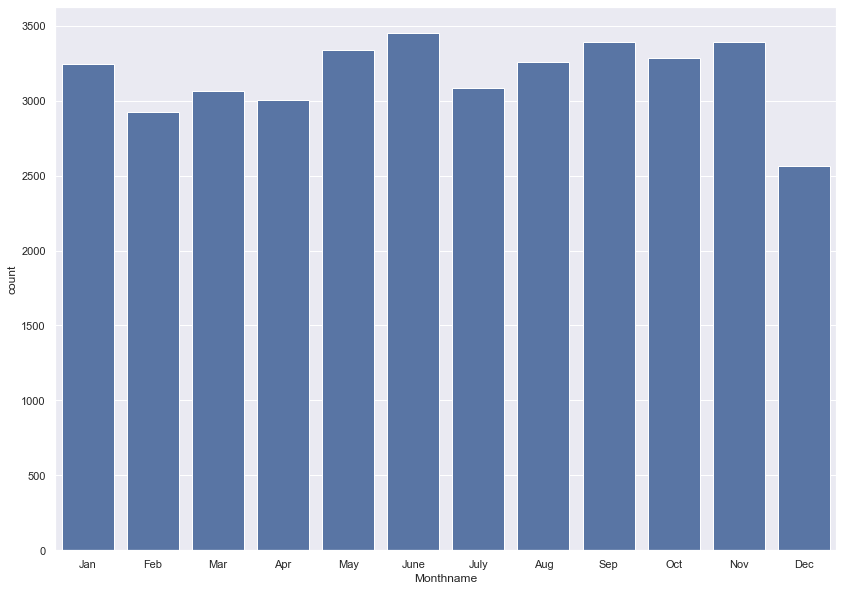

In [34]:
ax = sns.countplot(x="Monthname", data=dfcolclinicpd,  order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [35]:
dfcolclinicpd.head()

,CLINICID,Age,proceduredate,Gender,count,day,month,year,Monthname
0,1,60,2016-06-21,M,1,21,6,2016,June
1,1,60,2016-12-07,M,1,7,12,2016,Dec
2,1,60,2016-07-26,M,1,26,7,2016,July
3,1,60,2016-09-08,M,1,8,9,2016,Sep
4,1,60,2016-08-16,M,1,16,8,2016,Aug


<AxesSubplot:xlabel='Gender', ylabel='count'>

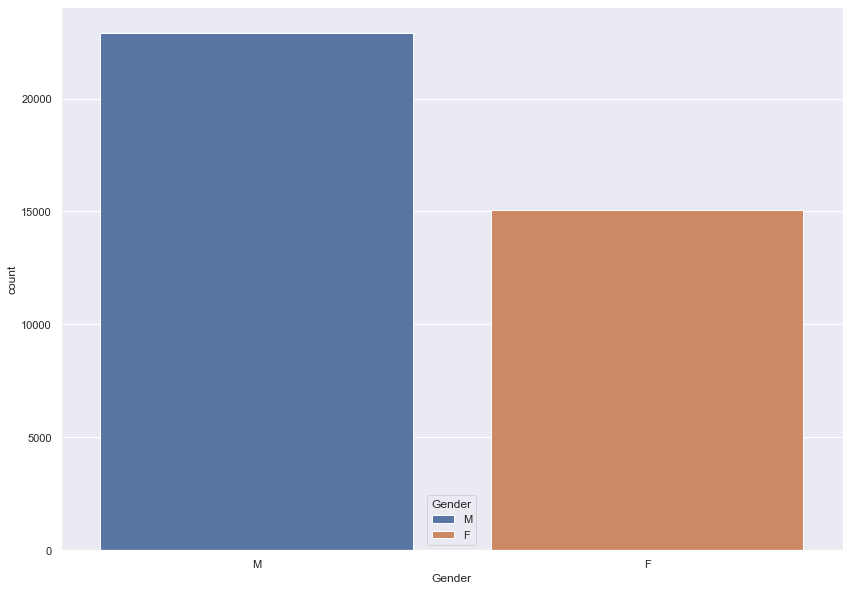

In [36]:
sns.countplot(x='Gender',hue='Gender',data=dfcolclinicpd,dodge=False)


In [37]:
y=dfcolclinicpd.groupby(['Gender'])['Gender'].count()
y

Gender
F    15086
M    22919
Name: Gender, dtype: int64

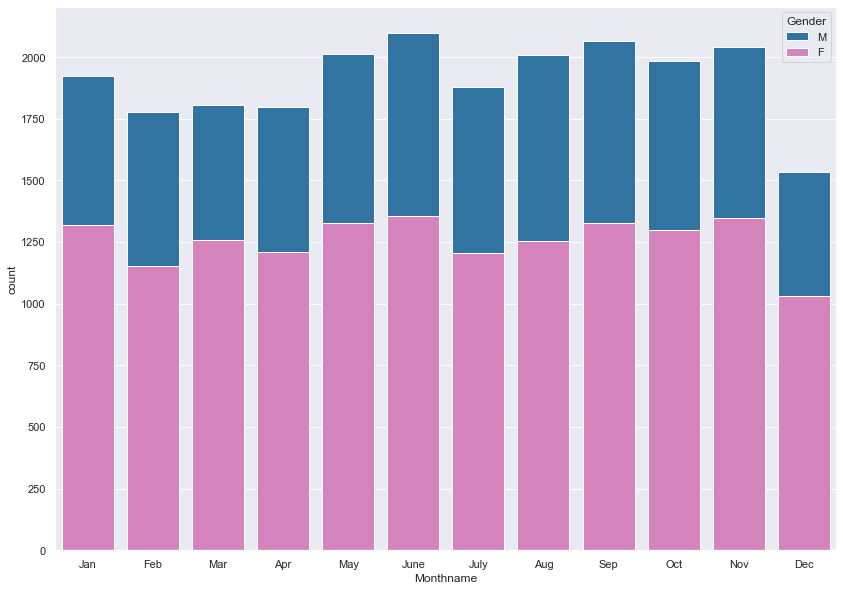

In [38]:
palette = {
    'M': 'tab:blue',
    'F': 'tab:pink',
}
ax= sns.countplot(x='Monthname',hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],data=dfcolclinicpd,dodge=False)

#ax = sns.barplot(x="Monthname", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 

In [39]:
#ax = sns.barplot(x="Monthname", y="count", data=dfcolclinicpd,  ci=68,hue='Gender',palette=palette, order=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],color='b') 
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1,69,2013-03-19,M,19,19,3,2013,Mar
1,2,69,2013-03-12,F,19,12,3,2013,Mar
2,3,69,2013-03-05,F,19,5,3,2013,Mar
3,4,69,2013-03-12,M,19,12,3,2013,Mar
4,5,69,2013-03-12,M,19,12,3,2013,Mar
...,...,...,...,...,...,...,...,...,...
41386,41387,60,2023-06-30,M,15,30,6,2023,June
41387,41388,62,2023-07-12,F,18,12,7,2023,July
41388,41389,62,2023-07-12,M,13,12,7,2023,July
41389,41390,80,2023-07-12,M,13,12,7,2023,July


In [40]:
dfcolraw=dfcolraw[(dfcolraw['year'] != 2012)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2013)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2020)]
dfcolraw=dfcolraw[(dfcolraw['year'] != 2023)]
dfcolraw=dfcolraw.reset_index(drop=True)
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,3,12,2022,Dec
33606,38926,65,2022-09-29,F,15,29,9,2022,Sep
33607,38953,71,2022-12-04,F,16,4,12,2022,Dec
33608,38971,66,2022-12-02,M,8,2,12,2022,Dec


In [41]:
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             33610 non-null  int64         
 1   Age            33610 non-null  int64         
 2   proceduredate  33610 non-null  datetime64[ns]
 3   Gender         33610 non-null  object        
 4   CLINICID       33610 non-null  int64         
 5   day            33610 non-null  int64         
 6   month          33610 non-null  int64         
 7   year           33610 non-null  int64         
 8   Monthname      33610 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.3+ MB


In [42]:

dfcolgenageyearaggregate=dfcolraw.groupby(['Gender','Age','year'])['ID'].count().reset_index()
dfcolgenageyearaggregate.tail()

,Gender,Age,year,ID
260,M,77,2021,29
261,M,77,2022,23
262,M,78,2021,10
263,M,78,2022,20
264,M,79,2022,10


In [43]:
dfcolraw.groupby(['year'])['ID'].count()

year
2014    3352
2015    4014
2016    4004
2017    4353
2018    4378
2019    4457
2021    4236
2022    4816
Name: ID, dtype: int64

In [44]:
## Using pivot function, specify the index, columns, and the values. The purpose here is to replace the NaN values, logically for each country and animal type
dflspivot= dfcolgenageyearaggregate.pivot (index=['Gender','Age'],columns='year',values='ID').reset_index()
dflspivot.head()


year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,F,57,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0


In [45]:
print( dflspivot.columns) # for columns
print(dflspivot.index) # for row indexes

Index(['Gender', 'Age', 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022], dtype='object', name='year')
RangeIndex(start=0, stop=46, step=1)


In [46]:
#Delete the 2012, 2013 and 2023 data since they are not complete and  might result in incorrect prediction
#dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[2]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[8]],axis=1)
#dflspivot = dflspivot.drop(dflspivot.columns[[10]],axis=1)
dflspivot

year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,F,57,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,F,59,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0
5,F,63,20.0,222.0,256.0,91.0,196.0,152.0,128.0,178.0
6,F,64,63.0,163.0,126.0,83.0,135.0,121.0,152.0,160.0
7,F,65,85.0,175.0,105.0,154.0,209.0,126.0,174.0,123.0
8,F,66,153.0,223.0,105.0,159.0,152.0,110.0,141.0,146.0
9,F,67,206.0,265.0,96.0,166.0,143.0,158.0,156.0,190.0


In [47]:
#There are more NULL values, these are the cases where for a country for all the years there is nothing submitted, we will mark such NaN as 0.

dflspivot.sort_values(by='Age', inplace=True) 

colnames=dflspivot.columns.values
for i in colnames:
    dflspivot[i] = dflspivot[i].replace(np.nan, 0)

In [48]:
dflspivot.reset_index()

year,index,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
0,23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,26,M,60,1.0,0.0,169.0,374.0,303.0,279.0,168.0,252.0
6,2,F,60,2.0,1.0,105.0,278.0,243.0,217.0,129.0,185.0
7,3,F,61,2.0,3.0,238.0,101.0,52.0,33.0,43.0,99.0
8,27,M,61,3.0,7.0,366.0,160.0,113.0,64.0,73.0,149.0
9,4,F,62,14.0,51.0,149.0,96.0,137.0,228.0,93.0,95.0


In [49]:
print (dflspivot.columns.tolist())

['Gender', 'Age', 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022]


In [50]:
dflspivot=dflspivot[['Gender','Age',2014,2015,2016,2017,2018,2019,2021,2022]]
dflspivot.head()

year,Gender,Age,2014,2015,2016,2017,2018,2019,2021,2022
23,M,53,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,F,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24,M,58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25,M,59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,F,59,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [51]:
dflspivotgt60=dflspivot[['Gender','Age',2016,2017,2018,2019,2021,2022]].loc[dflspivot['Age']>=60]
dflspivotlt69=dflspivotgt60[['Gender','Age',2016,2017,2018,2019,2021,2022]].loc[dflspivotgt60['Age']<=69]
dflspivotlt69.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 26 to 35
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  20 non-null     object 
 1   Age     20 non-null     int64  
 2   2016    20 non-null     float64
 3   2017    20 non-null     float64
 4   2018    20 non-null     float64
 5   2019    20 non-null     float64
 6   2021    20 non-null     float64
 7   2022    20 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.4+ KB


In [52]:
dflspivotlt69['mean'] = dflspivotlt69.iloc[:, 2:8].mean(axis=1)
dflspivotcm=dflspivotlt69.copy()


In [53]:
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,M,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,F,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,M,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,F,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,M,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [54]:
gendermap = {'M':1, 'F':2}
dflspivotcm['Gender'] = dflspivotcm['Gender'].map(gendermap)
dflspivotcm

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,1,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,2,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,2,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,1,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,2,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,1,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,2,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,1,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,2,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,1,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [55]:
dflspivotlt69.head()

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000


year       Age      2016      2017      2018      2019      2021      2022  \
year                                                                         
Age   1.000000 -0.308279  0.200155 -0.000549  0.231453  0.427394  0.417008   
2016 -0.308279  1.000000 -0.098762  0.058134 -0.057872 -0.074930  0.116710   
2017  0.200155 -0.098762  1.000000  0.636784  0.617920  0.424990  0.682446   
2018 -0.000549  0.058134  0.636784  1.000000  0.545108  0.701116  0.603525   
2019  0.231453 -0.057872  0.617920  0.545108  1.000000  0.506240  0.613625   
2021  0.427394 -0.074930  0.424990  0.701116  0.506240  1.000000  0.639758   
2022  0.417008  0.116710  0.682446  0.603525  0.613625  0.639758  1.000000   
mean  0.203712  0.247763  0.782048  0.832791  0.774436  0.731995  0.846526   

year      mean  
year            
Age   0.203712  
2016  0.247763  
2017  0.782048  
2018  0.832791  
2019  0.774436  
2021  0.731995  
2022  0.846526  
mean  1.000000  


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}, xlabel='year', ylabel='year'>

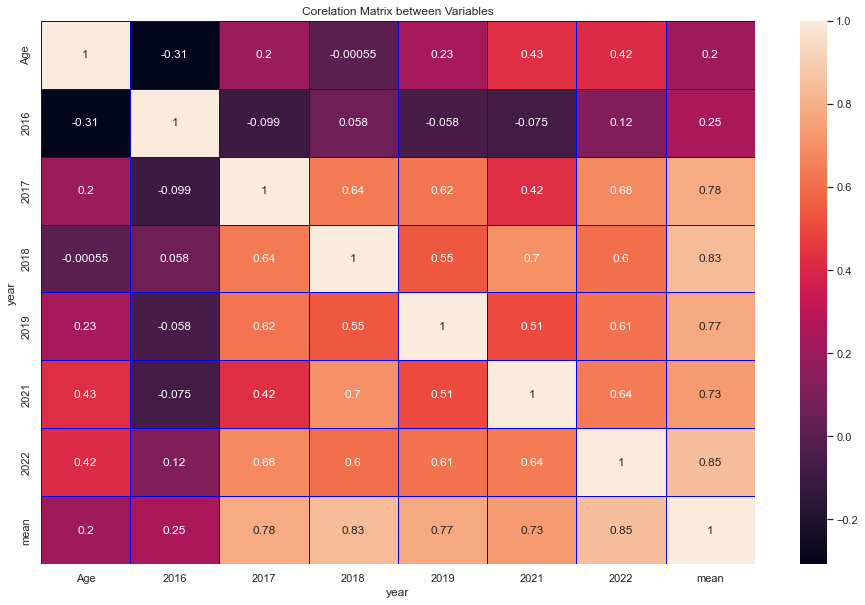

In [56]:
#Plot the co-relation matrix
correlation = dflspivotlt69.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [57]:
dflspivotcm2=dfcolraw.copy()
dflspivotcm2.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan


In [58]:
dflspivotcm2=dflspivotcm2[['ID','Age','Gender','month']]
dflspivotcm2['Gender'] = dflspivotcm2['Gender'].map(gendermap)
dflspivotcm2=dflspivotcm2.groupby(['Age','Gender','month'])['ID'].count().reset_index()

dflspivotcm2

,Age,Gender,month,ID
0,53,1,7,1
1,57,2,4,1
2,58,1,2,1
3,59,1,3,1
4,59,1,7,1
...,...,...,...,...
465,79,2,8,1
466,79,2,10,1
467,79,2,11,1
468,79,2,12,1


             Age    Gender     month        ID
Age     1.000000 -0.010767  0.050310 -0.624869
Gender -0.010767  1.000000  0.019298 -0.248625
month   0.050310  0.019298  1.000000  0.043801
ID     -0.624869 -0.248625  0.043801  1.000000


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}>

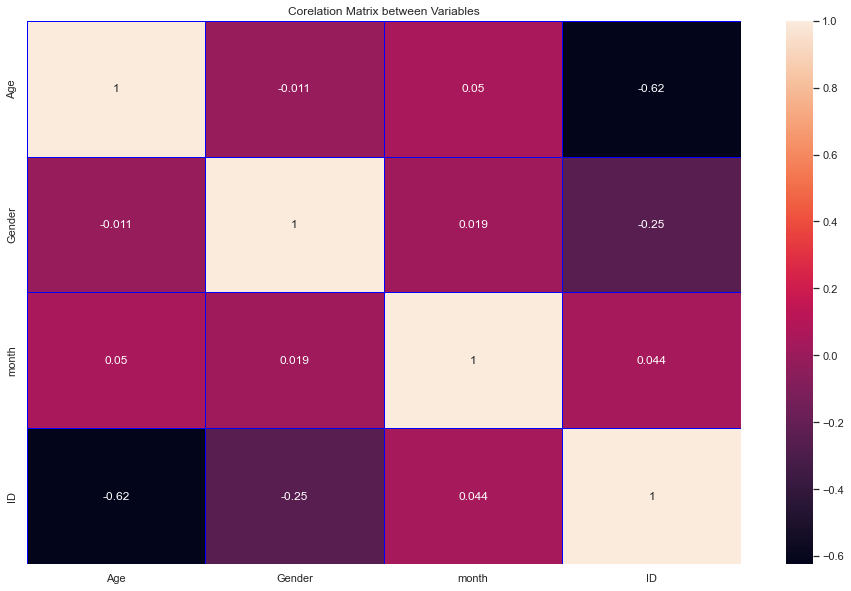

In [59]:
#Plot the co-relation matrix
correlation = dflspivotcm2.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [60]:
dfcolmean=dflspivotlt69[['Gender','Age','mean']]
dfcolmean

year,Gender,Age,mean
26,M,60,257.500000
2,F,60,192.833333
3,F,61,94.333333
27,M,61,154.166667
4,F,62,133.000000
28,M,62,182.333333
5,F,63,166.833333
29,M,63,221.333333
6,F,64,129.500000
30,M,64,206.333333


In [61]:
#Import Census Data

#Read the csv file with utf-8 decoding
dfcensusm = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Male_Msc.csv')
dfcensusf = pd.read_csv('C:/Users/raku4/Documents/MSc/Sem 3/EligiblePopulation_Female_Msc.csv')



dfcensusm

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611
5,45,M,37710,37289,37053,36472,36650,36050,34926,34356,32611,32050
6,46,M,37289,37053,36472,36650,36050,34926,34356,32611,32050,31353
7,47,M,37053,36472,36650,36050,34926,34356,32611,32050,31353,30684
8,48,M,36472,36650,36050,34926,34356,32611,32050,31353,30684,30891
9,49,M,36650,36050,34926,34356,32611,32050,31353,30684,30891,29775


In [62]:
dfcensusm['meanE'] = dfcensusm.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusm.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,M,40301,41401,41644,39275,37940,37710,37289,37053,36472,36650,39711.833333
1,41,M,41401,41644,39275,37940,37710,37289,37053,36472,36650,36050,39209.833333
2,42,M,41644,39275,37940,37710,37289,37053,36472,36650,36050,34926,38485.166667
3,43,M,39275,37940,37710,37289,37053,36472,36650,36050,34926,34356,37623.166667
4,44,M,37940,37710,37289,37053,36472,36650,36050,34926,34356,32611,37185.666667


In [63]:
dfcensusf['meanE'] = dfcensusf.iloc[:, 2:8].mean(axis=1) # Only until 2014 is considered for mean
dfcensusf.head()

,Age,Gender,2022E,2021E,2020E,2019E,2018E,2017E,2016E,2015E,2014E,2013E,meanE
0,40,F,43143,43696,43337,41408,39379,38506,38127,37471,37145,37081,41578.166667
1,41,F,43696,43337,41408,39379,38506,38127,37471,37145,37081,36199,40742.166667
2,42,F,43337,41408,39379,38506,38127,37471,37145,37081,36199,35025,39704.666667
3,43,F,41408,39379,38506,38127,37471,37145,37081,36199,35025,34414,38672.666667
4,44,F,39379,38506,38127,37471,37145,37081,36199,35025,34414,32204,37951.500000


In [64]:
#Data frame to only take mean
dfcensusmmean=dfcensusm[['Age','Gender','meanE']]
dfcensusfmean=dfcensusf[['Age','Gender','meanE']]

In [65]:
#Let us take mean data for the eligible population in census
dfcensusmmean=dfcensusmmean.loc[dfcensusm['Age']>=60]
dfcensusmmean

,Age,Gender,meanE
20,60,M,26555.166667
21,61,M,25772.500000
22,62,M,25068.833333
23,63,M,24299.833333
24,64,M,23751.500000
25,65,M,23105.833333
26,66,M,22364.000000
27,67,M,21731.666667
28,68,M,20980.666667
29,69,M,20312.500000


In [66]:
#dfcensusmmean=dfcensusmmean.loc[dfcensusm2019['Age']<70]


In [67]:
#Let us take 2019 data which is most reliable since it is latest year pre-covid and expect same tendency to continue from 2024 if the age range is untouched.
dfcensusf2019=dfcensusf[['Age','Gender','2019E']].loc[dfcensusf['Age']>=60]
dfcensusf2019=dfcensusf2019[['Age','Gender','2019E']].loc[dfcensusf2019['Age']<70]
dfcensusf2019

,Age,Gender,2019E
20,60,F,26312
21,61,F,26109
22,62,F,25183
23,63,F,24662
24,64,F,24524
25,65,F,23018
26,66,F,23375
27,67,F,21897
28,68,F,21236
29,69,F,21159


In [68]:
dfcensusmean = [dfcensusmmean, dfcensusfmean]

In [69]:
dfcensusmean=pd.concat(dfcensusmean)


In [70]:
dfcensusmean.reset_index(drop=True)


,Age,Gender,meanE
0,60,M,26555.166667
1,61,M,25772.500000
2,62,M,25068.833333
3,63,M,24299.833333
4,64,M,23751.500000
...,...,...,...
77,86,F,4906.666667
78,87,F,3656.500000
79,88,F,2528.833333
80,89,F,1541.000000


In [71]:
dfcolmean.reset_index(drop=True)

year,Gender,Age,mean
0,M,60,257.500000
1,F,60,192.833333
2,F,61,94.333333
3,M,61,154.166667
4,F,62,133.000000
5,M,62,182.333333
6,F,63,166.833333
7,M,63,221.333333
8,F,64,129.500000
9,M,64,206.333333


In [72]:
print( dfcolmean.columns) # for columns
#print(dfcolmean.index) # for row indexes

Index(['Gender', 'Age', 'mean'], dtype='object', name='year')


In [73]:
dfcolmean = dfcolmean.rename_axis(columns=None)
dfcolmean.reset_index(drop=True)

,Gender,Age,mean
0,M,60,257.500000
1,F,60,192.833333
2,F,61,94.333333
3,M,61,154.166667
4,F,62,133.000000
5,M,62,182.333333
6,F,63,166.833333
7,M,63,221.333333
8,F,64,129.500000
9,M,64,206.333333


In [74]:
dfcolmean.reset_index(inplace=True, drop=True)
dfcensusmean.reset_index(inplace=True, drop=True)

In [75]:
dfcensusmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     82 non-null     int64  
 1   Gender  82 non-null     object 
 2   meanE   82 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [76]:
result = pd.merge(dfcolmean, dfcensusmean, on=["Age", "Gender"])

In [77]:
result['percent']=result['mean']*100/result['meanE']

In [78]:
result

,Gender,Age,mean,meanE,percent
0,M,60,257.500000,26555.166667,0.969679
1,F,60,192.833333,27237.000000,0.707983
2,F,61,94.333333,26503.500000,0.355928
3,M,61,154.166667,25772.500000,0.598183
4,F,62,133.000000,25781.500000,0.515874
5,M,62,182.333333,25068.833333,0.727331
6,F,63,166.833333,24968.000000,0.668189
7,M,63,221.333333,24299.833333,0.910843
8,F,64,129.500000,24478.500000,0.529036
9,M,64,206.333333,23751.500000,0.868717


In [79]:
result.groupby(['Gender']).mean()


,Age,mean,meanE,percent
Gender,,,,
F,64.5,146.816667,24136.466667,0.613372
M,64.5,219.216667,23394.250000,0.949900


In [80]:
#Data frame to only take mean
dfcensusmall=dfcensusm[['Age','Gender','meanE']]
dfcensusfall=dfcensusf[['Age','Gender','meanE']]

In [81]:
conact1 = [dfcensusmall, dfcensusfall]
dfcensusall=pd.concat(conact1)
dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]



In [82]:

import numpy as np

dfcensus5569['Projectedcol'] = np.where(dfcensus5569['Gender']=='M', dfcensus5569['meanE']*0.95/100, dfcensus5569['meanE']*0.61/100)

dfcensus5569.reset_index(drop=True,inplace=True)
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


                   Age     meanE  Projectedcol
Age           1.000000 -0.991809     -0.501496
meanE        -0.991809  1.000000      0.393390
Projectedcol -0.501496  0.393390      1.000000


<AxesSubplot:title={'center':'Corelation Matrix between Variables'}>

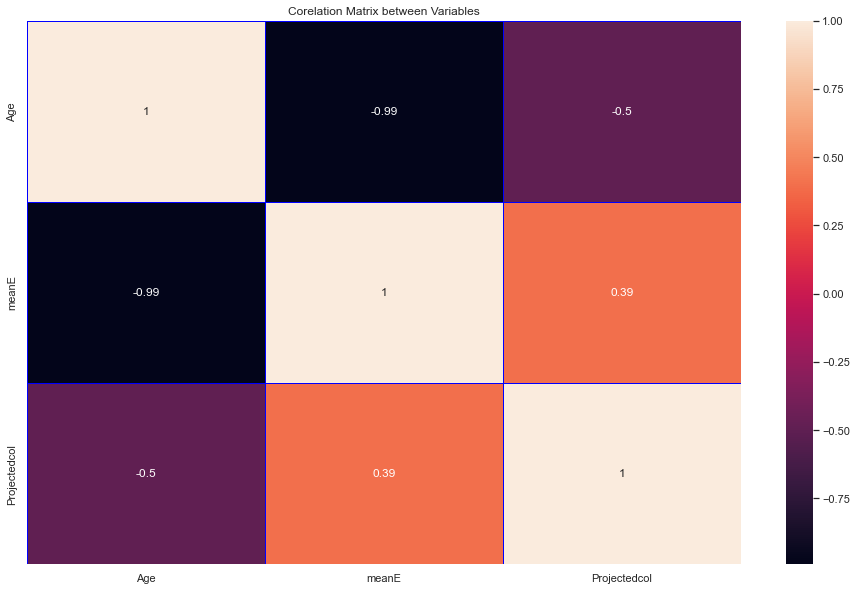

In [83]:
#Plot the co-relation matrix
correlation = dfcensus5569.corr()
print(correlation)
plt.figure(figsize=(16,10))
plt.title('Corelation Matrix between Variables')
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [84]:
#There is a corerelation of 0.37 bewteen the census number snad the projected colonoscopies

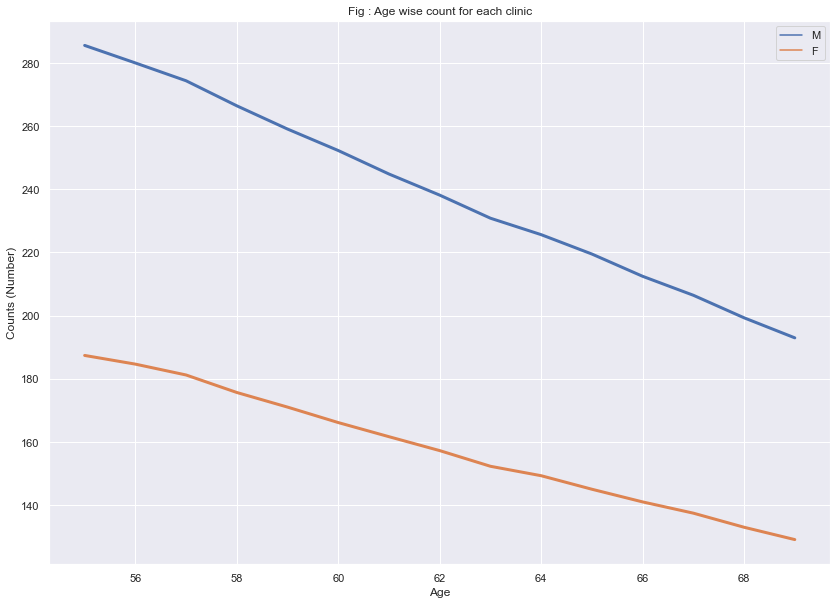

In [85]:
#Plot showing agewise counts

sns.set_style('darkgrid') #usage of seaborn library set the style
sns.set(rc={'figure.figsize':(14,10)}) #usage of seaborn library set the figure size
sns.color_palette("tab10")#usage of seaborn library set the color palette
ax = sns.lineplot(data=dfcensus5569, x ='Age', y = 'Projectedcol',
                  hue='Gender', lw=3) # Draw the plot
plt.legend(bbox_to_anchor=(1, 1)) # Set the legends 
plt.ylabel('Counts (Number)') # Y label
plt.xlabel('Age') # X label
plt.title('Fig : Age wise count for each clinic') # Set the title
plt.show() # Display the plot


In [86]:
# Next step use seperate populations for M and F, see the total count from dfcensus5569, 
#see above for the average in the sample and do a hypothesis testing for the expected total

# Hypothesis Testing

In [87]:
#Statistics Library
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Sample 1: Male population between 60-69



In [88]:
# Mean =209

In [89]:
# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=209, # mean average for male population 60-69
              scale = 4
              )

(183.74499394079623, 234.25500605920374)

In [90]:
# create 95% confidence interval, use the scipy.stats
st.t.interval(alpha=0.95, 
              df=1, # Dataframe length
              loc=209, # mean average for male population 60-69
              scale = 4
              )

(158.1751810542716, 259.8248189457284)

In [91]:
# As seen above at 90% CI the colonoscopies vary between 183 to 234.
# Now, taking the whole population from 55-70, we see in the chart male population max is 275. Doing a T-Test for one population

In [92]:
#Get the projected values from the populations for Male
X=dfcensus5569['Projectedcol'].loc[(dfcensus5569['Gender']=='M')]




In [93]:
#H0 : u = 275
#H1 : u < 275
#stats.ttest_1samp(X,mu of H0)
st.ttest_1samp(X,275)

Ttest_1sampResult(statistic=-4.631946392946002, pvalue=0.00038816017205040325)

In [94]:
# Hypothesis is rejected since p value is less than 0.05

In [95]:
#H1 : u > 230
st.t.sf(-6.195641472339939, 8)

0.9998696682756691

In [96]:
# T Test shows the max number of colonoscopies for M is greater than 230

<Figure size 1008x720 with 0 Axes>

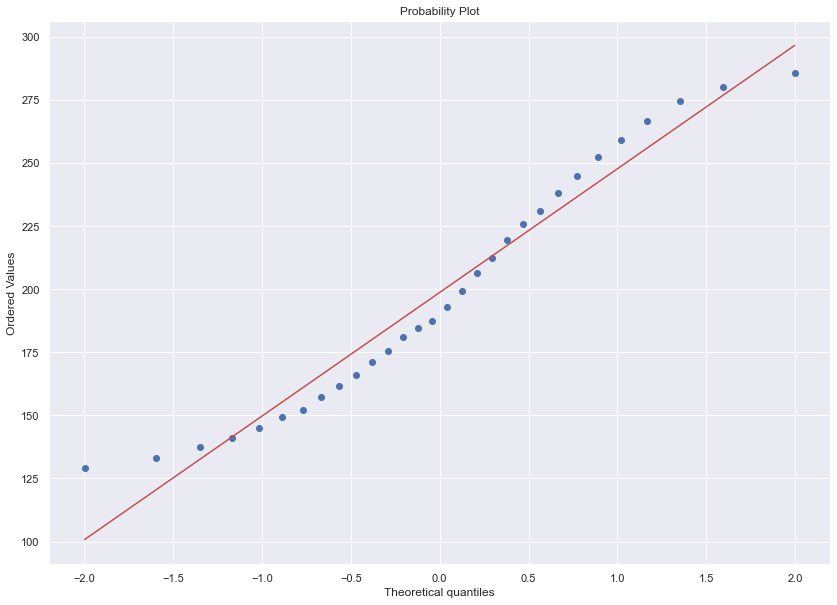

<Figure size 1008x720 with 0 Axes>

In [97]:
#Normality plot. Our variable is "charges"

st.probplot(dfcensus5569.Projectedcol, plot=plt)
plt.figure()

In [98]:
dfcensus5569.head()

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083


In [99]:
#Shapiro wilk test for Male

st.shapiro(dfcensus5569.Projectedcol[dfcensus5569.Gender == "M"])

ShapiroResult(statistic=0.9598639011383057, pvalue=0.6900299191474915)

In [100]:
#Shapiro wilk test for Female

st.shapiro(dfcensus5569.Projectedcol[dfcensus5569.Gender == "F"])

ShapiroResult(statistic=0.9548131227493286, pvalue=0.6031501889228821)

In [101]:
#ONE-WAY ANOVA
#H0 : Variances of Mean value for the genders are same
#H1 : Variances of Mean value for the genders are different

model = ols('Projectedcol~Gender', data = dfcensus5569).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

            df        sum_sq       mean_sq          F        PR(>F)
Gender     1.0  49256.213300  49256.213300  78.045392  1.378246e-09
Residual  28.0  17671.433657    631.122631        NaN           NaN


In [102]:
from scipy.stats import mannwhitneyu

#H0 : Median values for the genders are the same.
#H1 : Median values for the genders are differnt.



# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(dfcensus5569['Projectedcol'].sort_values(), dfcensus5569['Projectedcol'].sort_values())
results

MannwhitneyuResult(statistic=450.0, pvalue=1.0)

# Sample 2: Female population between 60-69


In [103]:
#mean = 136

# create 90% confidence interval, use the scipy.stats
st.t.interval(alpha=0.90, 
              df=1, # Dataframe length
              loc=136, # mean average for male population 60-69
              scale = 4
              )

(110.74499394079623, 161.25500605920374)

In [104]:
#Get the projected values from the populations for Female
X=dfcensus5569['Projectedcol'].loc[(dfcensus5569['Gender']=='F')]

In [105]:
#H0 : u = 161
#H1 : u > 110
#stats.ttest_1samp(X,mu of H0)
st.ttest_1samp(X,161)

Ttest_1sampResult(statistic=-0.5763906915478207, pvalue=0.5735018389945836)

In [106]:
#H1 : u > 110
st.t.sf(-2.8640589660047233, 8)

0.9894900518884822

In [107]:
#ANOVA TWO WAYS
#H0 : Variances of Mean value for the age and gender are same
#H1 : Variances of Mean value for the age and gender are different
  
model2 = ols('Projectedcol~Age+Gender', data = dfcensus5569).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

            df        sum_sq       mean_sq            F        PR(>F)
Gender     1.0  49256.213300  49256.213300  1584.653699  1.625153e-25
Age        1.0  16832.185461  16832.185461   541.519195  2.120368e-19
Residual  27.0    839.248196     31.083267          NaN           NaN


# Dataset for Machine Learning model time series

In [108]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,3,1,2014,Jan
1,1315,69,2014-01-03,M,9,3,1,2014,Jan
2,1316,68,2014-01-03,F,9,3,1,2014,Jan
3,1319,68,2014-01-03,F,1,3,1,2014,Jan
4,1320,67,2014-01-03,M,1,3,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,3,12,2022,Dec
33606,38926,65,2022-09-29,F,15,29,9,2022,Sep
33607,38953,71,2022-12-04,F,16,4,12,2022,Dec
33608,38971,66,2022-12-02,M,8,2,12,2022,Dec


In [109]:
dfcolraw.loc[(dfcolraw['Age']>=55)&(dfcolraw['Age']<70)].groupby(['Age','Gender','proceduredate','month','year'])['ID'].agg(["count"]).reset_index()


#dfcensus5569=dfcensusall.loc[(dfcensusall['Age']>=55) & (dfcensusall['Age']<70)]


,Age,Gender,proceduredate,month,year,count
0,57,F,2015-04-29,4,2015,1
1,58,M,2018-02-07,2,2018,1
2,59,F,2017-03-02,3,2017,1
3,59,F,2018-09-18,9,2018,1
4,59,M,2018-07-09,7,2018,1
...,...,...,...,...,...,...
18226,69,M,2022-12-19,12,2022,2
18227,69,M,2022-12-20,12,2022,1
18228,69,M,2022-12-21,12,2022,2
18229,69,M,2022-12-22,12,2022,2


In [110]:
dfcolraw['day']=1
#dfcolraw['firstdate']=dfcolraw['firstdate'].astype(Date)
dfcolraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             33610 non-null  int64         
 1   Age            33610 non-null  int64         
 2   proceduredate  33610 non-null  datetime64[ns]
 3   Gender         33610 non-null  object        
 4   CLINICID       33610 non-null  int64         
 5   day            33610 non-null  int64         
 6   month          33610 non-null  int64         
 7   year           33610 non-null  int64         
 8   Monthname      33610 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.3+ MB


In [111]:
#dfcolraw['firstdate']=pd.to_datetime(dfcolraw[["year", "month", "day"]], format='%d%b%Y')

In [112]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname
0,1314,68,2014-01-03,M,9,1,1,2014,Jan
1,1315,69,2014-01-03,M,9,1,1,2014,Jan
2,1316,68,2014-01-03,F,9,1,1,2014,Jan
3,1319,68,2014-01-03,F,1,1,1,2014,Jan
4,1320,67,2014-01-03,M,1,1,1,2014,Jan
...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec


In [113]:
dfcolraw['Quarterdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='Q').to_timestamp()
dfcolraw['Weekdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='W').to_timestamp()
dfcolraw['Monthdate'] = pd.PeriodIndex(dfcolraw.proceduredate, freq='M').to_timestamp()

dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep,2022-07-01,2022-09-26,2022-09-01
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01


In [114]:
dfcolraw.groupby(['Monthdate'])['ID'].count()

Monthdate
2014-01-01    182
2014-02-01    152
2014-03-01    183
2014-04-01    218
2014-05-01    277
             ... 
2022-08-01    423
2022-09-01    465
2022-10-01    489
2022-11-01    514
2022-12-01    344
Name: ID, Length: 96, dtype: int64

In [115]:
#Changethe Date field to pandas datetime
#dfcolraw['proceduredate'] = pd.to_datetime(dfcolraw['proceduredate'], format='%d/%m/%Y')

df_timeseries = dfcolraw.groupby(['Quarterdate','Age','Gender'])['ID'].count().reset_index()
#dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
df_timeseries

,Quarterdate,Age,Gender,ID
0,2014-01-01,64,F,1
1,2014-01-01,64,M,1
2,2014-01-01,65,F,1
3,2014-01-01,65,M,3
4,2014-01-01,66,F,21
...,...,...,...,...
983,2022-10-01,78,F,1
984,2022-10-01,78,M,3
985,2022-10-01,79,F,2
986,2022-10-01,79,M,3


In [116]:
dfcensus5560=dfcensus5569[['Age','Gender','Projectedcol']].loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<61)]

In [117]:
dfcensus5560

,Age,Gender,Projectedcol
0,55,M,285.560500
1,56,M,280.012500
2,57,M,274.363167
3,58,M,266.435417
4,59,M,259.076083
5,60,M,252.274083
15,55,F,187.401150
16,56,F,184.649033
17,57,F,181.212700
18,58,F,175.669833


In [118]:
df_timeseries = df_timeseries.set_index('Quarterdate')
df_timeseries.head(20)

,Age,Gender,ID
Quarterdate,,,
2014-01-01,64,F,1
2014-01-01,64,M,1
2014-01-01,65,F,1
2014-01-01,65,M,3
2014-01-01,66,F,21
2014-01-01,66,M,26
2014-01-01,67,F,46
2014-01-01,67,M,80
2014-01-01,68,F,50


In [119]:
print(f'Number of rows with missing values: {df_timeseries.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [120]:
df_timeseriesQD = dfcolraw.groupby(['Quarterdate'])['ID'].count()
#df_timeseriesQD=df_timeseriesQD.set_index(Quarterdate)
df_timeseriesQD=pd.DataFrame(df_timeseriesQD)
df_timeseriesQD.head(200)

,ID
Quarterdate,
2014-01-01,517
2014-04-01,797
2014-07-01,1010
2014-10-01,1028
2015-01-01,1084
2015-04-01,1020
2015-07-01,993
2015-10-01,917
2016-01-01,973


In [121]:
df_timeseriesQD = df_timeseriesQD.asfreq('Q','ffill')
df_timeseriesQD

,ID
Quarterdate,
2014-03-31,517
2014-06-30,797
2014-09-30,1010
2014-12-31,1028
2015-03-31,1084
2015-06-30,1020
2015-09-30,993
2015-12-31,917
2016-03-31,973


In [122]:
#train = df_timeseriesQD[(df_timeseriesQD.index < pd.to_datetime("2019-01-01", format='%Y-%m-%d')) ]
#test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2019-01-01", format='%Y-%m-%d')]
## Split data into train-test
## ==============================================================================
#steps = 36
##train = df_timeseriesQD[:-steps]
##test  = df_timeseriesQD[-steps:]
#print(train.shape)
#print(test.shape)
#train

In [123]:
train = df_timeseriesQD[(df_timeseriesQD.index > pd.to_datetime("2014-08-01", format='%Y-%m-%d')) 
                         &(df_timeseriesQD.index < pd.to_datetime("2019-01-01", format='%Y-%m-%d')) ]
test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2019-01-01", format='%Y-%m-%d')]
# Split data into train-test
# ==============================================================================
steps = 36
#train = df_timeseriesQD[:-steps]
#test  = df_timeseriesQD[-steps:]
print(train.shape)
print(test.shape)
train

(18, 1)
(15, 1)


,ID
Quarterdate,
2014-09-30,1010
2014-12-31,1028
2015-03-31,1084
2015-06-30,1020
2015-09-30,993
2015-12-31,917
2016-03-31,973
2016-06-30,1087
2016-09-30,991


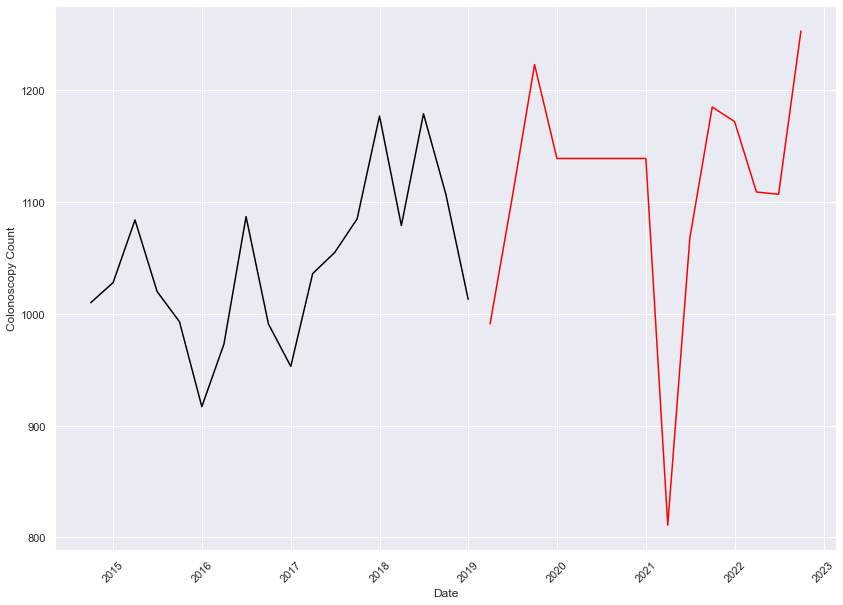

In [124]:
plt.plot(train[['ID']], color = "black", label = 'Training')
plt.plot(test[['ID']], color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train/Test split for Sentiment"
plt.show()

In [125]:
# The above graph shows there is no seasonality and trend, checking for stationary next using ADF Test

In [126]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test for stationary where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.
result = adfuller(train.ID.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -6.522272512002404
p-value: 1.0350741602201415e-08
Critial Values:
   1%, -4.331573
Critial Values:
   5%, -3.23295
Critial Values:
   10%, -2.7487


In [127]:
# ADF test shows p-value less than 0.05 hene the hypothesis is rejected and stationary is confirmed

In [128]:
#dfri=train.reset_index()
train

,ID
Quarterdate,
2014-09-30,1010
2014-12-31,1028
2015-03-31,1084
2015-06-30,1020
2015-09-30,993
2015-12-31,917
2016-03-31,973
2016-06-30,1087
2016-09-30,991


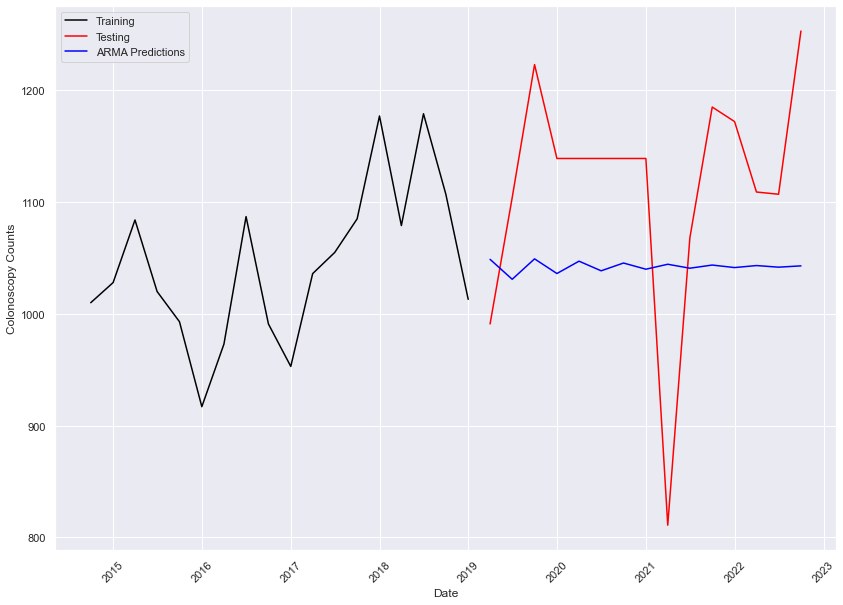

In [129]:
#ARMA modelsince there is no seasonality or trend
from statsmodels.tsa.arima.model import ARIMA 

y = train['ID']

 

ARMAmodel = ARIMA(y, order = (2, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Counts')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train test and Predictions for Colonoscopy Counts"
plt.plot(y_pred_outARMA, color='blue', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [130]:
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["ID"].values, y_pred_df["Predictions"])) 
print("RMSE: ",arma_rmse)

RMSE:  124.22752575155864


In [131]:
# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [132]:
df_timeseries

,Age,Gender,ID
Quarterdate,,,
2014-01-01,64,F,1
2014-01-01,64,M,1
2014-01-01,65,F,1
2014-01-01,65,M,3
2014-01-01,66,F,21
...,...,...,...
2022-10-01,78,F,1
2022-10-01,78,M,3
2022-10-01,79,F,2


In [133]:
#df_timeseriesQE=df_timeseries.copy()
#df_timeseriesQE=pd.DataFrame(df_timeseriesQE).reset_index()
#df_timeseriesQE

In [134]:
#df_timeseriesQE=df_timeseriesQE.set_index(pd.to_datetime(df_timeseriesQE['Quarterdate']))
#df_timeseriesQE

In [135]:

#train = df_timeseries[(df_timeseries.index < pd.to_datetime("2022-01-01", format='%Y-%m-%d')) ]
#test = df_timeseries[df_timeseries.index >= pd.to_datetime("2022-01-01", format='%Y-%m-%d')]

#print(train.shape)
#print(test.shape)
#train

In [136]:
#print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
#print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

In [137]:
#test[['Age','Gender']]

In [138]:
#train['Gender'] = train['Gender'].map(gendermap)
#test.info()

In [139]:
#test['Gender'] = test['Gender'].map(gendermap)
#train

In [140]:
df_timeseriesQD = dfcolraw.groupby(['Quarterdate'])['ID'].count()
df_timeseriesQD=pd.DataFrame(df_timeseriesQD).reset_index()
df_timeseriesQD=df_timeseriesQD.set_index(pd.to_datetime(df_timeseriesQD['Quarterdate']))
#df_timeseriesQD=df_timeseriesQD[['ID']]
df_timeseriesQD = df_timeseriesQD.asfreq('Q','ffill')

df_timeseriesQD

,Quarterdate,ID
Quarterdate,,
2014-03-31,2014-01-01,517
2014-06-30,2014-04-01,797
2014-09-30,2014-07-01,1010
2014-12-31,2014-10-01,1028
2015-03-31,2015-01-01,1084
2015-06-30,2015-04-01,1020
2015-09-30,2015-07-01,993
2015-12-31,2015-10-01,917
2016-03-31,2016-01-01,973


In [141]:
dfcolraw.groupby(['Weekdate'])['ID'].count()

Weekdate
2013-12-30     11
2014-01-06     46
2014-01-13     53
2014-01-20     33
2014-01-27     39
             ... 
2022-11-28    123
2022-12-05    102
2022-12-12     94
2022-12-19     93
2022-12-26      5
Name: ID, Length: 416, dtype: int64

In [142]:
df_timeseriesWD = dfcolraw.groupby(['Weekdate'])['ID'].count()
df_timeseriesWD=pd.DataFrame(df_timeseriesWD).reset_index()
df_timeseriesWD=df_timeseriesWD.set_index(pd.to_datetime(df_timeseriesWD['Weekdate']))

df_timeseriesWD = df_timeseriesWD.asfreq('W','ffill')
df_timeseriesWD.head(2)

,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46


In [143]:
#train = df_timeseriesQD[(df_timeseriesQD.index < pd.to_datetime("2019-01-01", format='%Y-%m-%d')) ]
#test = df_timeseriesQD[df_timeseriesQD.index >= pd.to_datetime("2019-01-01", format='%Y-%m-%d')]

print(train.shape)
print(test.shape)
train

(18, 1)
(15, 1)


,ID
Quarterdate,
2014-09-30,1010
2014-12-31,1028
2015-03-31,1084
2015-06-30,1020
2015-09-30,993
2015-12-31,917
2016-03-31,973
2016-06-30,1087
2016-09-30,991


In [144]:
# Create and train forecaster for Quarter
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=train['ID'])
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=15)
predictions.head(50)


2019-03-31    1001.15
2019-06-30     960.23
2019-09-30     997.52
2019-12-31    1011.85
2020-03-31    1007.10
2020-06-30     985.99
2020-09-30     973.87
2020-12-31    1028.22
2021-03-31    1048.65
2021-06-30    1064.87
2021-09-30    1122.66
2021-12-31    1109.11
2022-03-31    1084.58
2022-06-30    1103.03
2022-09-30    1091.09
Freq: Q-DEC, Name: pred, dtype: float64

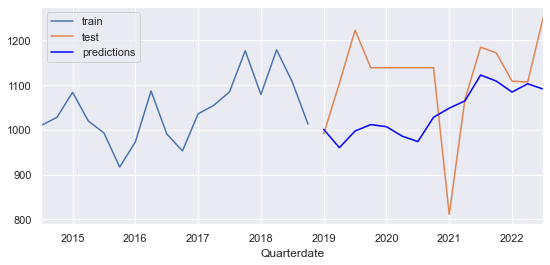

In [145]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train['ID'].plot(ax=ax, label='train')
test['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='blue')
ax.legend();

In [146]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = test['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 17285.778413333337


In [147]:
trainw = df_timeseriesWD[(df_timeseriesWD.index < pd.to_datetime("2019-01-01", format='%Y-%m-%d')) ]
testw = df_timeseriesWD[df_timeseriesWD.index >= pd.to_datetime("2019-01-01", format='%Y-%m-%d')]

print(trainw.shape)
print(testw.shape)
trainw

(261, 2)
(208, 2)


,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46
2014-01-19,2014-01-13,53
2014-01-26,2014-01-20,33
2014-02-02,2014-01-27,39
...,...,...
2018-12-02,2018-11-26,86
2018-12-09,2018-12-03,91
2018-12-16,2018-12-10,94


C:\Users\raku4\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


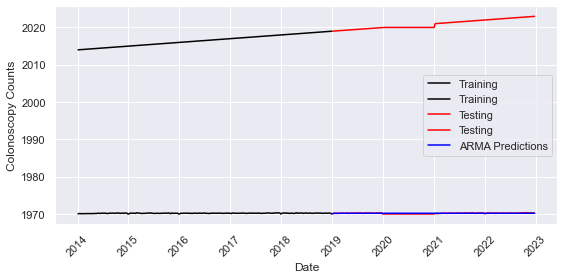

In [148]:
#ARMA modelsince there is no seasonality or trend
from statsmodels.tsa.arima.model import ARIMA 

y = trainw['ID']

 

ARMAmodel = ARIMA(y, order = (2, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(testw.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = testw.index
y_pred_outARMA = y_pred_df["Predictions"] 

fig, ax = plt.subplots(figsize=(9, 4))
plt.plot(trainw, color = "black", label = 'Training')
plt.plot(testw, color = "red", label = 'Testing')
plt.ylabel('Colonoscopy Counts')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title="Train test and Predictions for Colonoscopy Counts"
plt.plot(y_pred_outARMA, color='blue', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [149]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = y_pred_df["Predictions"]
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 1707.345655383809


In [150]:
# Create and train forecaster for week
# ==============================================================================
#forecaster = ForecasterAutoreg(
#                regressor = RandomForestRegressor(random_state=123),
#                lags = 2
#                )
#
#forecaster.fit(y=trainw['ID'])
#forecaster
## Predictions
## ==============================================================================
#predictions = forecaster.predict(steps=132)
#predictions.head(50)


In [151]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 2
                )

forecaster.fit(y=trainw['ID'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2] 
Transformer for y: None 
Transformer for exog: None 
Window size: 2 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2014-01-05 00:00:00'), Timestamp('2018-12-30 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-08-27 17:56:04 
Last fit date: 2023-08-27 17:56:04 
Skforecast version: 0.7.0 
Python version: 3.9.12 
Forecaster id: None 

In [152]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=208)
predictions

2019-01-06    46.500
2019-01-13    60.220
2019-01-20    66.000
2019-01-27    88.530
2019-02-03    86.000
               ...  
2022-11-27    92.117
2022-12-04    87.740
2022-12-11    85.970
2022-12-18    92.117
2022-12-25    87.740
Freq: W-SUN, Name: pred, Length: 208, dtype: float64

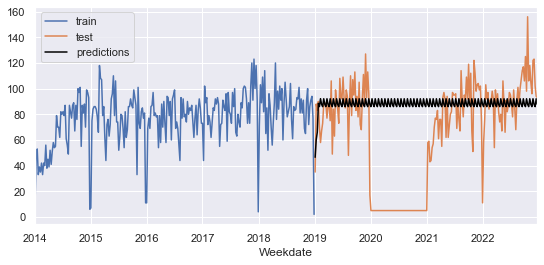

In [153]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [154]:
trainw.tail

<bound method NDFrame.tail of              Weekdate  ID
Weekdate                 
2014-01-05 2013-12-30  11
2014-01-12 2014-01-06  46
2014-01-19 2014-01-13  53
2014-01-26 2014-01-20  33
2014-02-02 2014-01-27  39
...               ...  ..
2018-12-02 2018-11-26  86
2018-12-09 2018-12-03  91
2018-12-16 2018-12-10  94
2018-12-23 2018-12-17  77
2018-12-30 2018-12-24   2

[261 rows x 2 columns]>

In [155]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 2093.7332780806623


In [156]:
len(trainw)*0.4

104.4

In [157]:
# Hyperparameter Grid search
# ==============================================================================
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [60,80]
  
# Regressor's hyperparameters
param_grid = {'n_estimators': [500,1000],
              'max_depth': [100,200]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = trainw['ID'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(trainw)*0.4),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 8.


loop lags_grid: 100%|███████████████████████████████████████| 2/2 [02:22<00:00, 71.27s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80] 
  Parameters: {'max_depth': 100, 'n_estimators': 500}
  Backtesting metric: 294.6155686624204



In [158]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 500}",294.615569,100,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 500}",294.615569,200,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 1000}",298.251596,100,1000
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 1000}",298.251596,200,1000
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 500}",310.497527,100,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 500}",310.497527,200,500
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 100, 'n_estimators': 1000}",313.032953,100,1000
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 200, 'n_estimators': 1000}",313.032953,200,1000


In [159]:
# Predictors importance
# ==============================================================================
#forecaster.get_feature_importance()

In [160]:
testw['ID']

Weekdate
2019-01-06     35
2019-01-13     88
2019-01-20     83
2019-01-27     90
2019-02-03     70
             ... 
2022-11-27    122
2022-12-04    123
2022-12-11    102
2022-12-18     94
2022-12-25     93
Freq: W-SUN, Name: ID, Length: 208, dtype: int64

In [161]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=100, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 80
             )

forecaster.fit(y=testw['ID'])

In [162]:
# Create and train forecaster
# ==============================================================================
#forecaster = ForecasterAutoreg(
#    
#                    regressor = make_pipeline(StandardScaler(),  LinearRegression()),
#                    #regressor = LinearRegression(),
#                    lags = 15
#             )
#
#forecaster.fit(y=trainw['ID'])
#
## Prediction intervals
## ==============================================================================
#predictions = forecaster.predict_interval(
#                    steps    = 156,
#                    interval = [10, 70],
#                    n_boot   = 100
#              )
#
#predictions.shape

In [163]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=208)
predictions.head

<bound method NDFrame.head of 2023-01-01     96.044
2023-01-08     93.540
2023-01-15     96.708
2023-01-22     87.744
2023-01-29     94.394
               ...   
2026-11-22    119.022
2026-11-29    120.374
2026-12-06    122.086
2026-12-13    122.780
2026-12-20    119.526
Freq: W-SUN, Name: pred, Length: 208, dtype: float64>

In [164]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testw['ID'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")


Test error (mse): 2730.9597114230774


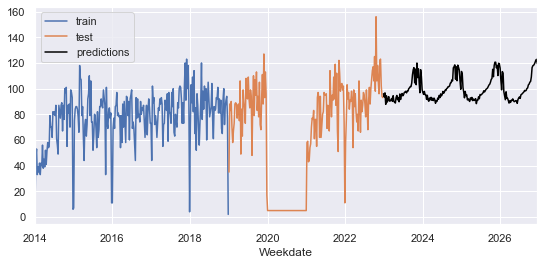

In [165]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [166]:
print(len(trainw)*0.8)

208.8


In [167]:
# Hyperparameter Grid search
# ==============================================================================
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput

forecaster = ForecasterAutoreg(
                    regressor = make_pipeline(StandardScaler(), Lasso(random_state=123)),
                    
                    lags      = 8 # This value will be replaced in the grid search
             )

# To access parameters of a scikitlearn pipeline the pattern:
# <name of the step>__<name of the parameter>.
param_grid = {'lasso__alpha': np.logspace(-5, 5, 10)}
lags_grid = [20, 30, 40,60]

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y           = trainw['ID'],
                        param_grid  = param_grid,
                        lags_grid   = lags_grid,
                        steps       = 208,
                        refit       = True,
                        metric      = 'mean_squared_error',
                        initial_train_size = int(len(trainw)*0.4),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
                )

Number of models compared: 40.


loop lags_grid: 100%|███████████████████████████████████████| 4/4 [00:01<00:00,  3.34it/s]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60] 
  Parameters: {'lasso__alpha': 3.593813663804626}
  Backtesting metric: 329.4197055633845



In [168]:
# Grid Search results
# ==============================================================================
results_grid.head()

,lags,params,mean_squared_error,lasso__alpha
35,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 3.593813663804626},329.419706,3.593814
25,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 3.593813663804626},330.625824,3.593814
39,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 100000.0},330.848726,100000.000000
37,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 599.4842503189421},330.848726,599.484250
36,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'lasso__alpha': 46.41588833612782},330.848726,46.415888


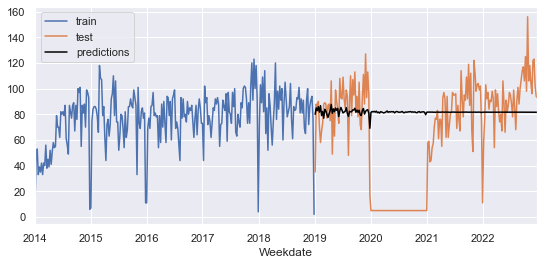

In [169]:
# Predictions
# ==============================================================================
predictions = forecaster.predict( steps    = 208)

# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
trainw['ID'].plot(ax=ax, label='train')
testw['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='black')
ax.legend();

In [170]:
dfcensus5569

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [171]:
dfcensus5569['Projectedcol'].sum()

5960.201583333333

In [172]:
dfcensus_ml=dfcensus5569.loc[(dfcensus5569['Age']>=55) & (dfcensus5569['Age']<71)]
dfcensus_ml

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [173]:
df_timeseriesml =dflspivotlt69[['Age','Gender','mean']].reset_index(drop=True)
dflspivotlt69

year,Gender,Age,2016,2017,2018,2019,2021,2022,mean
26,M,60,169.0,374.0,303.0,279.0,168.0,252.0,257.500000
2,F,60,105.0,278.0,243.0,217.0,129.0,185.0,192.833333
3,F,61,238.0,101.0,52.0,33.0,43.0,99.0,94.333333
27,M,61,366.0,160.0,113.0,64.0,73.0,149.0,154.166667
4,F,62,149.0,96.0,137.0,228.0,93.0,95.0,133.000000
28,M,62,216.0,141.0,137.0,313.0,137.0,150.0,182.333333
5,F,63,256.0,91.0,196.0,152.0,128.0,178.0,166.833333
29,M,63,352.0,144.0,263.0,191.0,170.0,208.0,221.333333
6,F,64,126.0,83.0,135.0,121.0,152.0,160.0,129.500000
30,M,64,198.0,119.0,232.0,181.0,278.0,230.0,206.333333


In [174]:
dfml = pd.merge(dfcensus_ml, df_timeseriesml, 'left',on=["Age", "Gender"])
dfml['Gender'] = dfml['Gender'].map(gendermap)

dfml

,Age,Gender,meanE,Projectedcol,mean
0,55,1,30059.000000,285.560500,NaN
1,56,1,29475.000000,280.012500,NaN
2,57,1,28880.333333,274.363167,NaN
3,58,1,28045.833333,266.435417,NaN
4,59,1,27271.166667,259.076083,NaN
5,60,1,26555.166667,252.274083,257.500000
6,61,1,25772.500000,244.838750,154.166667
7,62,1,25068.833333,238.153917,182.333333
8,63,1,24299.833333,230.848417,221.333333
9,64,1,23751.500000,225.639250,206.333333


In [175]:
dfml['mean'] = dfml['mean'].fillna(dfml['Projectedcol'])

In [176]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           30 non-null     int64  
 1   Gender        30 non-null     int64  
 2   meanE         30 non-null     float64
 3   Projectedcol  30 non-null     float64
 4   mean          30 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.4 KB


In [177]:
dfcolpdavg=dfcolraw.groupby(['Age','Gender','CLINICID','month','year'])['ID'].count()

#dfcolpdavg=dfcolraw.groupby(['Age','proceduredate'])['ID'].count()
dfcolpdavg=pd.DataFrame(dfcolpdavg)
dfcolpdavg.reset_index(inplace=True)
dfcolpdavg['Gender'] = dfcolpdavg['Gender'].map(gendermap)

dfcolpdavg

,Age,Gender,CLINICID,month,year,ID
0,53,1,9,7,2018,1
1,57,2,24,4,2015,1
2,58,1,9,2,2018,1
3,59,2,2,3,2017,1
4,59,2,18,9,2018,1
...,...,...,...,...,...,...
17180,79,1,9,7,2022,1
17181,79,1,16,11,2022,1
17182,79,1,17,1,2022,1
17183,79,1,21,10,2022,1


In [178]:
#X = dfcolpdavg[['Age','Gender','meanE','Projectedcol']].values
dfcolpdavg

,Age,Gender,CLINICID,month,year,ID
0,53,1,9,7,2018,1
1,57,2,24,4,2015,1
2,58,1,9,2,2018,1
3,59,2,2,3,2017,1
4,59,2,18,9,2018,1
...,...,...,...,...,...,...
17180,79,1,9,7,2022,1
17181,79,1,16,11,2022,1
17182,79,1,17,1,2022,1
17183,79,1,21,10,2022,1


In [179]:
#Import Libraries for ML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [180]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
dfml['mean_l1'] = dfml ['mean'].shift(1)
dfml['mean_l2'] = dfml ['mean'].shift(2)
dfml['mean_l3'] = dfml ['mean'].shift(3)
dfml['mean_l4'] = dfml ['mean'].shift(4)
dfml['mean_l5'] = dfml ['mean'].shift(5)

# Display the first 10 records


dfml.bfill(axis = 0,inplace=True)

In [181]:
dfml

,Age,Gender,meanE,Projectedcol,mean,mean_l1,mean_l2,mean_l3,mean_l4,mean_l5
0,55,1,30059.000000,285.560500,285.560500,285.560500,285.560500,285.560500,285.560500,285.560500
1,56,1,29475.000000,280.012500,280.012500,285.560500,285.560500,285.560500,285.560500,285.560500
2,57,1,28880.333333,274.363167,274.363167,280.012500,285.560500,285.560500,285.560500,285.560500
3,58,1,28045.833333,266.435417,266.435417,274.363167,280.012500,285.560500,285.560500,285.560500
4,59,1,27271.166667,259.076083,259.076083,266.435417,274.363167,280.012500,285.560500,285.560500
5,60,1,26555.166667,252.274083,257.500000,259.076083,266.435417,274.363167,280.012500,285.560500
6,61,1,25772.500000,244.838750,154.166667,257.500000,259.076083,266.435417,274.363167,280.012500
7,62,1,25068.833333,238.153917,182.333333,154.166667,257.500000,259.076083,266.435417,274.363167
8,63,1,24299.833333,230.848417,221.333333,182.333333,154.166667,257.500000,259.076083,266.435417
9,64,1,23751.500000,225.639250,206.333333,221.333333,182.333333,154.166667,257.500000,259.076083


<AxesSubplot:>

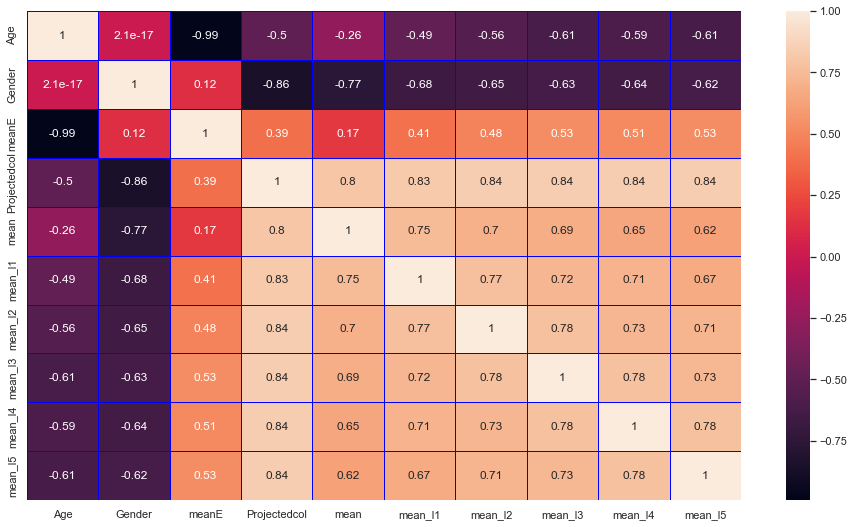

In [182]:
correlation = dfml.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

Training data Accuracy :  0.6828569612453668
Testing data  Accuracy :  -9.27782899093964


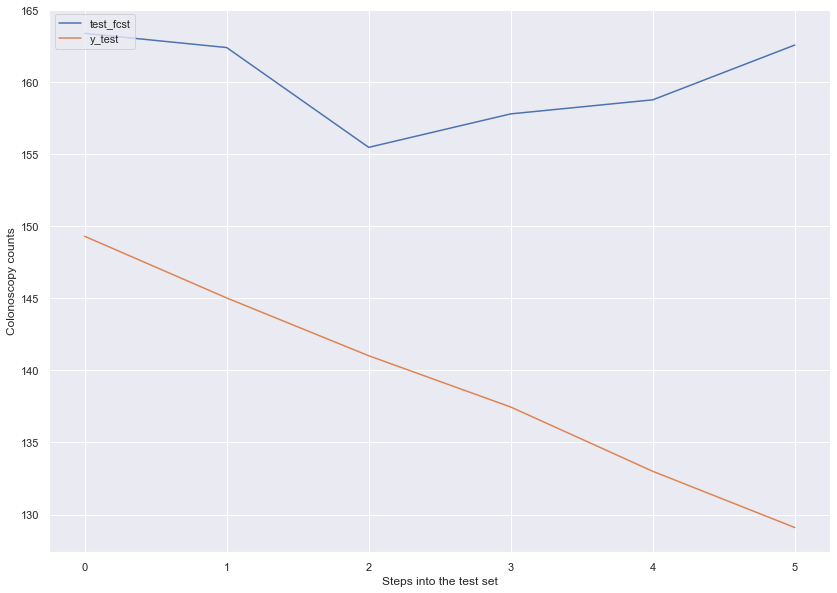

In [183]:


# Create X and y objects
X = dfml[['mean_l1','mean_l2']].values
y = dfml['Projectedcol'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = False)


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [184]:
X_train

array([[285.5605    , 285.5605    ],
       [285.5605    , 285.5605    ],
       [280.0125    , 285.5605    ],
       [274.36316667, 280.0125    ],
       [266.43541667, 274.36316667],
       [259.07608333, 266.43541667],
       [257.5       , 259.07608333],
       [154.16666667, 257.5       ],
       [182.33333333, 154.16666667],
       [221.33333333, 182.33333333],
       [206.33333333, 221.33333333],
       [228.83333333, 206.33333333],
       [206.        , 228.83333333],
       [227.66666667, 206.        ],
       [228.33333333, 227.66666667],
       [279.66666667, 228.33333333],
       [187.40115   , 279.66666667],
       [184.64903333, 187.40115   ],
       [181.2127    , 184.64903333],
       [175.66983333, 181.2127    ],
       [171.04298333, 175.66983333],
       [192.83333333, 171.04298333],
       [ 94.33333333, 192.83333333],
       [133.        ,  94.33333333]])

# Cross Validation

# GRID SEARCH CV

In [185]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rf =RandomForestRegressor()
lm.fit(X_train, y_train)
rf.fit(X_train, y_train)
rfe = RFE(rf)             
lre = RFE(lm)      
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [186]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

0.9289706769732103
0.4706215494227261


Fitting 2 folds for each of 3 candidates, totalling 6 fits
0.6579554018558765
0.5874407545562018


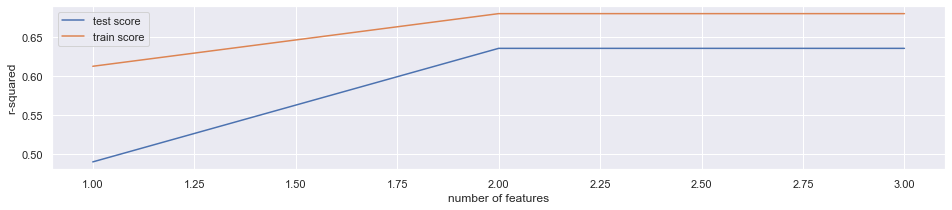

In [187]:
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lre, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# K Neighbours Regressor

In [188]:
from sklearn.neighbors import KNeighborsRegressor

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)





neighbors=np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Declare and initialise kNN classifier with k neighbors
    kNR = KNeighborsRegressor(n_neighbors = k)
    
    #Call the method fit to train the model
    kNR.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i]=kNR.score(X_train,y_train)
    
    #Compute accuracy on the training set
    test_accuracy[i]=kNR.score(X_test,y_test)
    
    
knr_train_acc=train_accuracy.mean()
knr_test_acc=test_accuracy.mean()
print(knr_train_acc)
print(knr_test_acc)

0.5129094862542204
-27.82407232739296


# Decision Tree Regressor

In [189]:
# import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor



tree = DecisionTreeRegressor(max_depth = 4)
tree.fit(X_train, y_train)

# Return a copy of the array collapsed into one dimension.
sort_idx = X.flatten().argsort()
len(sort_idx)
#lin_regplot(X[sort_idx], y[sort_idx], tree)
# plt.xlabel('% lower status of the population [LSTAT]')
# plt.ylabel('Price in $1000\'s [MEDV]')
# # plt.savefig('./figures/tree_regression.png', dpi = 300)
# plt.show()

60

In [190]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

DT_R2_Train=r2_score(y_train, y_train_pred)
DT_R2_Test=r2_score(y_test, y_test_pred)

R^2 train: 0.972, test: -8.296


In [191]:
#print("Train Prediction : ",y_train_pred)
#print("Test Prediction : ",y_test_pred)
    #Compute accuracy on the training set
train_accuracy[i]=tree.score(X_train,y_train)
    
    #Compute accuracy on the training set
test_accuracy[i]=tree.score(X_test,y_test)

DT_Train_acc=train_accuracy.mean()
DT_Test_acc=test_accuracy.mean()
print(DT_Train_acc)
print(DT_Test_acc)


0.5569704053990845
-25.864182896290338


# GRID CV

In [192]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [193]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [194]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.999436,-0.630149
1,3,2,0.999780,-0.677324
2,2,3,0.999780,-0.669329


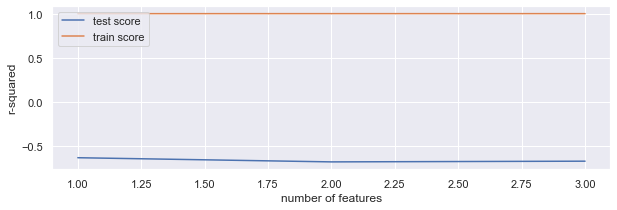

In [195]:
# plotting cv results
plt.figure(figsize=(10,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [196]:
#Random Forest Regressor

In [197]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor







# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)



RandomForestRegressor(criterion='mse', n_estimators=1000, n_jobs=-1,
                      random_state=1)

In [198]:
# All the ML algorthims shows very small accruarcy.

In [199]:
dfcolraw

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
33605,38654,70,2022-12-03,M,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33606,38926,65,2022-09-29,F,15,1,9,2022,Sep,2022-07-01,2022-09-26,2022-09-01
33607,38953,71,2022-12-04,F,16,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01
33608,38971,66,2022-12-02,M,8,1,12,2022,Dec,2022-10-01,2022-11-28,2022-12-01


In [200]:
#dfml = pd.merge(dfcensus_ml, df_timeseriesml, 'left',on=["Age", "Gender"])
#dfml['Gender'] = dfml['Gender'].map(gendermap)

dfcensus_ml.describe()
dfcensus_ml

,Age,Gender,meanE,Projectedcol
0,55,M,30059.000000,285.560500
1,56,M,29475.000000,280.012500
2,57,M,28880.333333,274.363167
3,58,M,28045.833333,266.435417
4,59,M,27271.166667,259.076083
5,60,M,26555.166667,252.274083
6,61,M,25772.500000,244.838750
7,62,M,25068.833333,238.153917
8,63,M,24299.833333,230.848417
9,64,M,23751.500000,225.639250


In [201]:
#dfcensus_ml.groupby(['year'])['ID'].count()


In [202]:
#Yearly average above is 188. Daily average is 188/52(weeks)=3.6 (4). Will add this to the weekly numbers from the colonoscopy records

In [203]:
df_timeseriesWD

,Weekdate,ID
Weekdate,,
2014-01-05,2013-12-30,11
2014-01-12,2014-01-06,46
2014-01-19,2014-01-13,53
2014-01-26,2014-01-20,33
2014-02-02,2014-01-27,39
...,...,...
2022-11-27,2022-11-21,122
2022-12-04,2022-11-28,123
2022-12-11,2022-12-05,102


In [204]:
df_timeseriesWD['ID']=df_timeseriesWD['ID']+4

In [205]:
df_timeseriesWD.reset_index(drop=True,inplace=True)
df_timeseriesWD.rename(columns = {'ID':'Counts'}, inplace = True)
df_timeseriesWD

,Weekdate,Counts
0,2013-12-30,15
1,2014-01-06,50
2,2014-01-13,57
3,2014-01-20,37
4,2014-01-27,43
...,...,...
464,2022-11-21,126
465,2022-11-28,127
466,2022-12-05,106
467,2022-12-12,98


In [206]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
df_timeseriesWD['Counts_l1'] = df_timeseriesWD ['Counts'].shift(1)
df_timeseriesWD['Counts_l2'] = df_timeseriesWD ['Counts'].shift(2)
df_timeseriesWD['Counts_l3'] = df_timeseriesWD ['Counts'].shift(3)
df_timeseriesWD['Counts_l4'] = df_timeseriesWD ['Counts'].shift(4)
df_timeseriesWD['Counts_l5'] = df_timeseriesWD ['Counts'].shift(5)
df_timeseriesWD

,Weekdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2013-12-30,15,NaN,NaN,NaN,NaN,NaN
1,2014-01-06,50,15.0,NaN,NaN,NaN,NaN
2,2014-01-13,57,50.0,15.0,NaN,NaN,NaN
3,2014-01-20,37,57.0,50.0,15.0,NaN,NaN
4,2014-01-27,43,37.0,57.0,50.0,15.0,NaN
...,...,...,...,...,...,...,...
464,2022-11-21,126,100.0,109.0,122.0,110.0,160.0
465,2022-11-28,127,126.0,100.0,109.0,122.0,110.0
466,2022-12-05,106,127.0,126.0,100.0,109.0,122.0
467,2022-12-12,98,106.0,127.0,126.0,100.0,109.0


In [207]:
df_timeseriesWD.bfill(axis = 0,inplace=True)
df_timeseriesWD

,Weekdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2013-12-30,15,15.0,15.0,15.0,15.0,15.0
1,2014-01-06,50,15.0,15.0,15.0,15.0,15.0
2,2014-01-13,57,50.0,15.0,15.0,15.0,15.0
3,2014-01-20,37,57.0,50.0,15.0,15.0,15.0
4,2014-01-27,43,37.0,57.0,50.0,15.0,15.0
...,...,...,...,...,...,...,...
464,2022-11-21,126,100.0,109.0,122.0,110.0,160.0
465,2022-11-28,127,126.0,100.0,109.0,122.0,110.0
466,2022-12-05,106,127.0,126.0,100.0,109.0,122.0
467,2022-12-12,98,106.0,127.0,126.0,100.0,109.0


In [208]:
#Quarter df

df_timeseriesQD
df_timeseriesQD['ID']=df_timeseriesQD['ID']+(188/4)
df_timeseriesQD=df_timeseriesQD.reset_index(drop=True)
df_timeseriesQD=df_timeseriesQD.rename(columns = {'ID':'Counts'})
df_timeseriesQD['Counts_l1'] = df_timeseriesQD ['Counts'].shift(1)
df_timeseriesQD['Counts_l2'] = df_timeseriesQD ['Counts'].shift(2)
df_timeseriesQD['Counts_l3'] = df_timeseriesQD ['Counts'].shift(3)
df_timeseriesQD['Counts_l4'] = df_timeseriesQD ['Counts'].shift(4)
df_timeseriesQD['Counts_l5'] = df_timeseriesQD ['Counts'].shift(5)

df_timeseriesQD

,Quarterdate,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2014-01-01,564.0,NaN,NaN,NaN,NaN,NaN
1,2014-04-01,844.0,564.0,NaN,NaN,NaN,NaN
2,2014-07-01,1057.0,844.0,564.0,NaN,NaN,NaN
3,2014-10-01,1075.0,1057.0,844.0,564.0,NaN,NaN
4,2015-01-01,1131.0,1075.0,1057.0,844.0,564.0,NaN
5,2015-04-01,1067.0,1131.0,1075.0,1057.0,844.0,564.0
6,2015-07-01,1040.0,1067.0,1131.0,1075.0,1057.0,844.0
7,2015-10-01,964.0,1040.0,1067.0,1131.0,1075.0,1057.0
8,2016-01-01,1020.0,964.0,1040.0,1067.0,1131.0,1075.0
9,2016-04-01,1134.0,1020.0,964.0,1040.0,1067.0,1131.0


In [209]:
dfcolraw.head()

,ID,Age,proceduredate,Gender,CLINICID,day,month,year,Monthname,Quarterdate,Weekdate,Monthdate
0,1314,68,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
1,1315,69,2014-01-03,M,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
2,1316,68,2014-01-03,F,9,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
3,1319,68,2014-01-03,F,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01
4,1320,67,2014-01-03,M,1,1,1,2014,Jan,2014-01-01,2013-12-30,2014-01-01


In [210]:
df_timeseriesMD = dfcolraw.groupby(['Monthdate'])['ID'].count()
df_timeseriesMD=pd.DataFrame(df_timeseriesMD).reset_index()
df_timeseriesMD=df_timeseriesMD.set_index(pd.to_datetime(df_timeseriesMD['Monthdate']))
#df_timeseriesQD=df_timeseriesQD[['ID']]
df_timeseriesMD = df_timeseriesMD.asfreq('M','bfill')

df_timeseriesMD.head(2)

,Monthdate,ID
Monthdate,,
2014-01-31,2014-02-01,152
2014-02-28,2014-03-01,183


In [211]:
##Month df

df_timeseriesMD
df_timeseriesMD=df_timeseriesMD.rename(columns = {'ID':'Counts'})
df_timeseriesMD['ID']=df_timeseriesMD['Counts']+(188/12)
df_timeseriesMD=df_timeseriesMD.reset_index(drop=True)
df_timeseriesMD['Counts_l1'] = df_timeseriesMD ['Counts'].shift(1)
df_timeseriesMD['Counts_l2'] = df_timeseriesMD ['Counts'].shift(2)
df_timeseriesMD['Counts_l3'] = df_timeseriesMD ['Counts'].shift(3)
df_timeseriesMD['Counts_l4'] = df_timeseriesMD ['Counts'].shift(4)
df_timeseriesMD['Counts_l5'] = df_timeseriesMD ['Counts'].shift(5)

df_timeseriesMD

,Monthdate,Counts,ID,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
0,2014-02-01,152,167.666667,NaN,NaN,NaN,NaN,NaN
1,2014-03-01,183,198.666667,152.0,NaN,NaN,NaN,NaN
2,2014-04-01,218,233.666667,183.0,152.0,NaN,NaN,NaN
3,2014-05-01,277,292.666667,218.0,183.0,152.0,NaN,NaN
4,2014-06-01,302,317.666667,277.0,218.0,183.0,152.0,NaN
...,...,...,...,...,...,...,...,...
102,2022-08-01,423,438.666667,365.0,393.0,371.0,343.0,401.0
103,2022-09-01,465,480.666667,423.0,365.0,393.0,371.0,343.0
104,2022-10-01,489,504.666667,465.0,423.0,365.0,393.0,371.0
105,2022-11-01,514,529.666667,489.0,465.0,423.0,365.0,393.0


In [212]:
df_timeseriesMD.bfill(axis = 0,inplace=True)


In [213]:
df_timeseriesQD.bfill(axis = 0,inplace=True)


<AxesSubplot:>

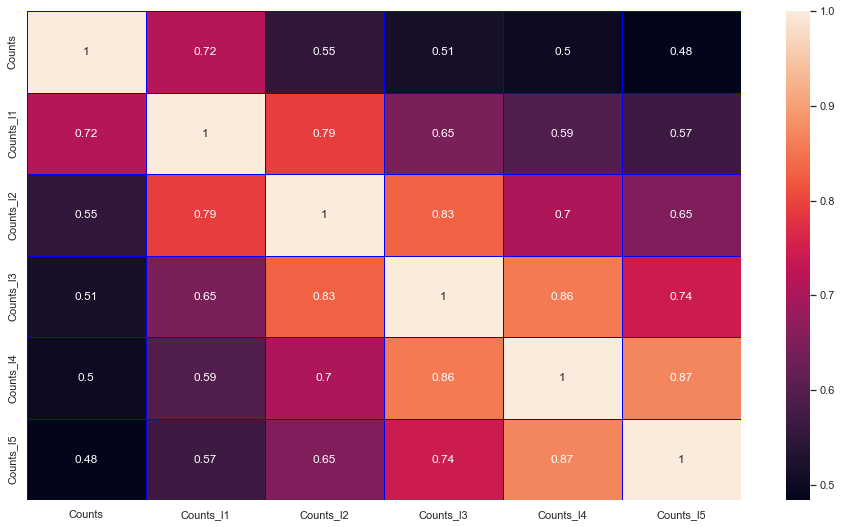

In [214]:
correlation = df_timeseriesQD.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [215]:
# Create X and y objects
X = df_timeseriesQD[['Counts_l1','Counts_l2','Counts_l3','Counts_l4']].values
y = df_timeseriesQD['Counts'].values

In [216]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


Training data Accuracy :  0.6802557791677133
Testing data  Accuracy :  -0.4204122788497293


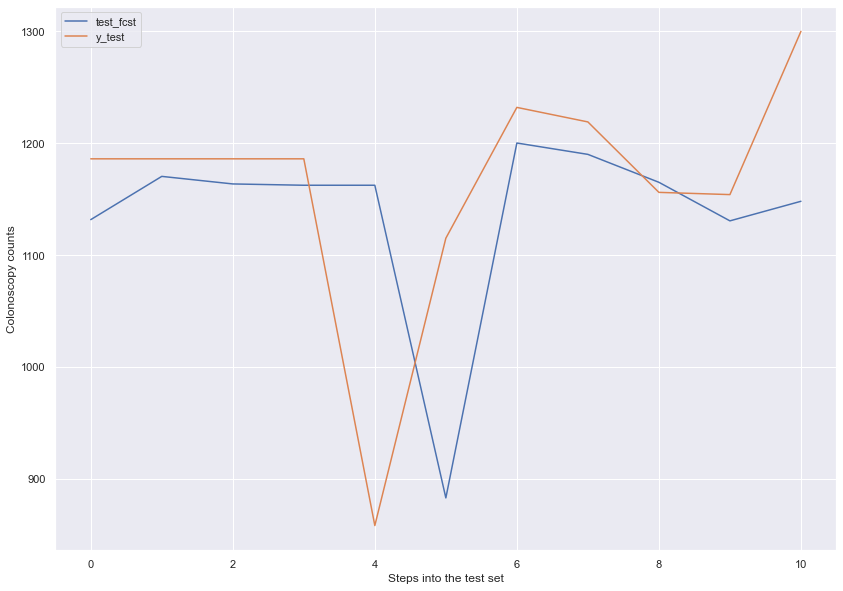

In [217]:


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [218]:
#CV

In [219]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=3)
scores.mean()

-0.01105711333634137

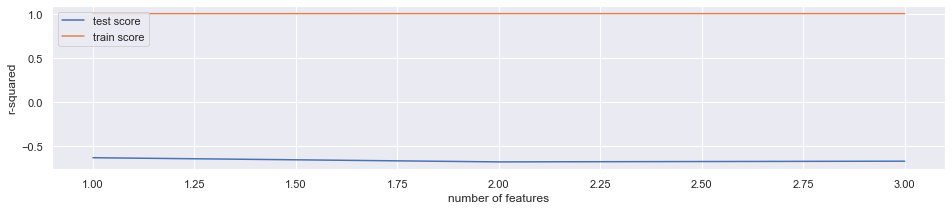

In [220]:
# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [221]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

-1.1939380609496748

# GRIDCV

In [222]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

-1.1939380609496748

In [223]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

0.6977435975715585
0.11637447242967774


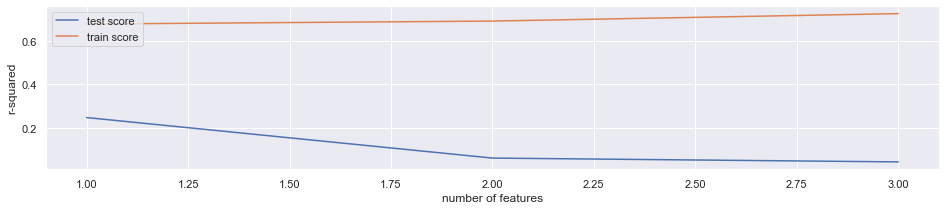

In [224]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

DT Regression

In [225]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, shuffle = False)


In [226]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


#-----
#parameters = {
#    'n_estimators': [100, 150, 200, 250, 300],
#    'max_depth': [1,2,3,4],
#}
#regr = RandomForestRegressor(random_state=0)
#
#clf = GridSearchCV(regr, parameters)
#clf.fit(X_train, y_train)
#----

# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [227]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.900423,-0.398873
1,4,2,0.940034,-1.754490
2,5,3,0.940034,-2.328063
3,3,4,0.940034,-1.720405
4,2,5,0.940034,-1.660178


In [228]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

scores = cross_val_score(forest, X_train, y_train, scoring='r2', cv=2)
scores.mean()

-3.1576211585731224

In [229]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rf =RandomForestRegressor()
lm.fit(X_train, y_train)
rf.fit(X_train, y_train)
rfe = RFE(rf)             
lre = RFE(lm)      
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [230]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
rf_cv_train=cv_results['mean_train_score'].mean()
rf_cv_test=cv_results['mean_test_score'].mean()
print(rf_cv_train)
print(rf_cv_test)

0.8703363194429191
0.26524347739281207


In [231]:
#Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
y_train_pred


array([ 752.949     ,  752.949     , 1005.28366667, 1065.17533333,
       1102.17566667, 1105.43      , 1047.826     , 1016.041     ,
       1049.86      , 1102.599     , 1089.105     , 1028.149     ,
       1076.858     , 1105.564     , 1115.046     , 1180.339     ,
       1139.361     , 1173.994     , 1154.863     , 1116.963     ,
       1055.458     , 1106.401     , 1205.094     , 1161.803     ,
       1166.663     , 1182.391     , 1167.43      , 1185.192     ])

In [232]:
# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R2_RF_train=r2_score(y_train, y_train_pred)
R2_RF_test=r2_score(y_test,y_test_pred)

R^2 train: 0.855, test: -0.171


In [233]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [234]:

y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


6144.369909317828

In [235]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12345, shuffle = False)


In [236]:
import lightgbm as lgb


In [237]:
model = lgb.LGBMRegressor(random_state=42,max_depth=100)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20)

[20]	training's l2: 1.16461e+06	valid_0's l2: 969467
[40]	training's l2: 1.16461e+06	valid_0's l2: 969467
[60]	training's l2: 1.16461e+06	valid_0's l2: 969467
[80]	training's l2: 1.16461e+06	valid_0's l2: 969467
[100]	training's l2: 1.16461e+06	valid_0's l2: 969467


LGBMRegressor(max_depth=100, random_state=42)

In [238]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.0000
Testing accuracy -0.7395


In [239]:
#Yearly average above is 188. Daily average is 188/365=0.6. Will add this to the weekly numbers from the colonoscopy records

# Daily data

In [240]:
df_timeseriesD = dfcolraw.groupby(['proceduredate'])['ID'].count()


In [241]:
df_timeseriesD=pd.DataFrame(df_timeseriesD).reset_index()
df_timeseriesD=df_timeseriesD.set_index(pd.to_datetime(df_timeseriesD['proceduredate']))

df_timeseriesD = df_timeseriesD.asfreq('D','bfill')
df_timeseriesD = df_timeseriesD.sort_index()
df_timeseriesD=df_timeseriesD[['ID']]
df_timeseriesD.head(100)

,ID
proceduredate,
2014-01-03,11
2014-01-04,5
2014-01-05,5
2014-01-06,5
2014-01-07,10
...,...
2014-04-08,20
2014-04-09,16
2014-04-10,8


In [242]:
traind = df_timeseriesD[(df_timeseriesD.index < pd.to_datetime("2020-01-01", format='%Y-%m-%d')) ]
testd = df_timeseriesD[df_timeseriesD.index >= pd.to_datetime("2020-01-01", format='%Y-%m-%d')]

print(traind.shape)
print(testd.shape)
testd.tail()

(2189, 1)
(1095, 1)


,ID
proceduredate,
2022-12-26,2
2022-12-27,2
2022-12-28,2
2022-12-29,1
2022-12-30,2


In [243]:
testd

,ID
proceduredate,
2020-01-01,17
2020-01-02,17
2020-01-03,17
2020-01-04,17
2020-01-05,17
...,...
2022-12-26,2
2022-12-27,2
2022-12-28,2


In [244]:
# Create and train forecaster for Quarter
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 500
                )

forecaster.fit(y=traind['ID'])
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=1095)
predictions.tail(50)

2022-11-11    11.12
2022-11-12    23.06
2022-11-13    22.63
2022-11-14    22.73
2022-11-15    21.53
2022-11-16    11.46
2022-11-17    19.40
2022-11-18     9.77
2022-11-19    23.73
2022-11-20    23.74
2022-11-21    23.89
2022-11-22    22.34
2022-11-23    17.74
2022-11-24    19.38
2022-11-25    10.79
2022-11-26    22.97
2022-11-27    22.64
2022-11-28    22.74
2022-11-29    21.60
2022-11-30    11.58
2022-12-01    19.22
2022-12-02     9.79
2022-12-03    23.82
2022-12-04    23.77
2022-12-05    23.90
2022-12-06    22.37
2022-12-07    17.64
2022-12-08    19.25
2022-12-09    11.08
2022-12-10    22.79
2022-12-11    22.61
2022-12-12    22.69
2022-12-13    21.63
2022-12-14    11.52
2022-12-15    19.18
2022-12-16     9.99
2022-12-17    23.63
2022-12-18    23.77
2022-12-19    23.88
2022-12-20    22.41
2022-12-21    17.86
2022-12-22    19.36
2022-12-23    10.77
2022-12-24    22.95
2022-12-25    22.57
2022-12-26    22.76
2022-12-27    21.67
2022-12-28    11.58
2022-12-29    19.35
2022-12-30     9.80


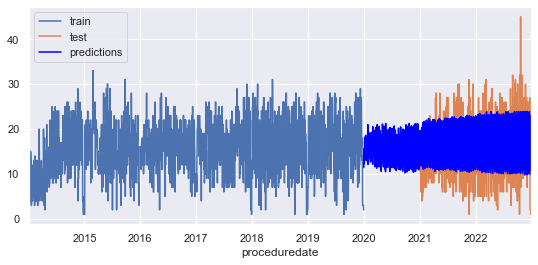

In [245]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
traind['ID'].plot(ax=ax, label='train')
testd['ID'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions',color='blue')
ax.legend();

In [246]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = testd['ID'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 39.26459552511415


In [247]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.0000
Testing accuracy -0.7395


In [248]:
df_daily = dfcolraw.groupby(['proceduredate','Age','Gender'])['ID'].count()
df_daily=pd.DataFrame(df_daily)
df_daily.reset_index(inplace=True)
df_daily

,proceduredate,Age,Gender,ID
0,2014-01-03,67,F,1
1,2014-01-03,67,M,2
2,2014-01-03,68,F,2
3,2014-01-03,68,M,1
4,2014-01-03,69,F,1
...,...,...,...,...
22677,2022-12-28,65,M,1
22678,2022-12-28,67,F,1
22679,2022-12-29,68,F,1
22680,2022-12-30,60,M,1


In [249]:
#Yearly average above is 188. Daily average is 188/365=0.6. Will add this to the daily numbers from the colonoscopy records
df_timeseriesPD=df_timeseriesD

df_timeseriesPD['ID']=df_timeseriesPD['ID']+1
df_timeseriesPD

,ID
proceduredate,
2014-01-03,12
2014-01-04,6
2014-01-05,6
2014-01-06,6
2014-01-07,11
...,...
2022-12-26,3
2022-12-27,3
2022-12-28,3


In [250]:
#df_timeseriesPD['Gender'] = df_timeseriesPD['Gender'].map(gendermap)


In [251]:
#df_timeseriesPD.reset_index(inplace=True)
df_timeseriesPD.rename(columns = {'ID':'Counts'}, inplace = True)
df_timeseriesPD

,Counts
proceduredate,
2014-01-03,12
2014-01-04,6
2014-01-05,6
2014-01-06,6
2014-01-07,11
...,...
2022-12-26,3
2022-12-27,3
2022-12-28,3


In [252]:
#From the above heat map we donot find any reliable variables, creating new set of variables which stores the value in the previous row.
df_timeseriesPD['Counts_l1'] = df_timeseriesPD ['Counts'].shift(1)
df_timeseriesPD['Counts_l2'] = df_timeseriesPD ['Counts'].shift(2)
df_timeseriesPD['Counts_l3'] = df_timeseriesPD ['Counts'].shift(3)
df_timeseriesPD['Counts_l4'] = df_timeseriesPD ['Counts'].shift(4)
df_timeseriesPD['Counts_l5'] = df_timeseriesPD ['Counts'].shift(5)
df_timeseriesPD

,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
proceduredate,,,,,,
2014-01-03,12,NaN,NaN,NaN,NaN,NaN
2014-01-04,6,12.0,NaN,NaN,NaN,NaN
2014-01-05,6,6.0,12.0,NaN,NaN,NaN
2014-01-06,6,6.0,6.0,12.0,NaN,NaN
2014-01-07,11,6.0,6.0,6.0,12.0,NaN
...,...,...,...,...,...,...
2022-12-26,3,3.0,3.0,4.0,20.0,28.0
2022-12-27,3,3.0,3.0,3.0,4.0,20.0
2022-12-28,3,3.0,3.0,3.0,3.0,4.0


In [253]:
df_timeseriesPD.bfill(axis = 0,inplace=True)
df_timeseriesPD

,Counts,Counts_l1,Counts_l2,Counts_l3,Counts_l4,Counts_l5
proceduredate,,,,,,
2014-01-03,12,12.0,12.0,12.0,12.0,12.0
2014-01-04,6,12.0,12.0,12.0,12.0,12.0
2014-01-05,6,6.0,12.0,12.0,12.0,12.0
2014-01-06,6,6.0,6.0,12.0,12.0,12.0
2014-01-07,11,6.0,6.0,6.0,12.0,12.0
...,...,...,...,...,...,...
2022-12-26,3,3.0,3.0,4.0,20.0,28.0
2022-12-27,3,3.0,3.0,3.0,4.0,20.0
2022-12-28,3,3.0,3.0,3.0,3.0,4.0


<AxesSubplot:>

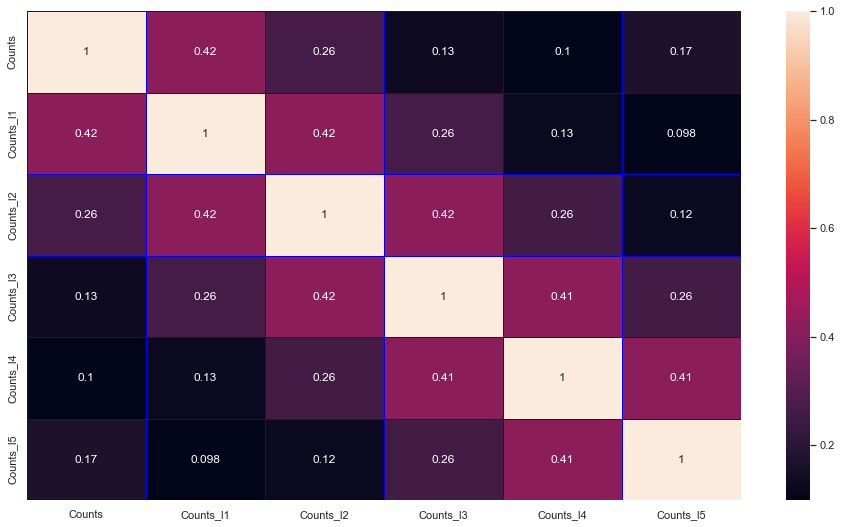

In [254]:
correlation = df_timeseriesPD.corr()

#After the columns are added
plt.figure(figsize=(16,9))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [255]:
# Create X and y objects
X = df_timeseriesPD[['Counts_l1','Counts_l2']].values
y = df_timeseriesPD['Counts'].values

In [256]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12345, shuffle = False)


Training data Accuracy :  0.2379430963381436
Testing data  Accuracy :  0.026143269967110916


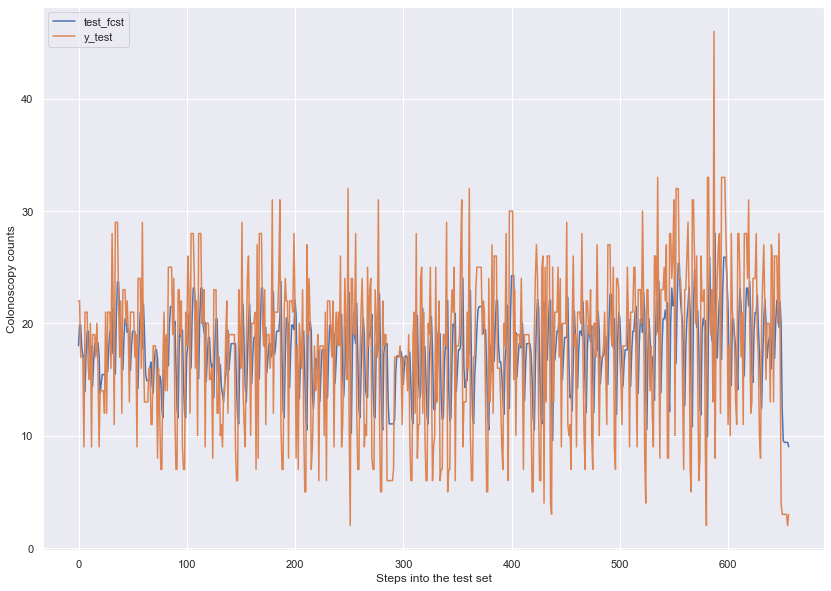

In [257]:


#Feature scalingmap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Fig 3')
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy counts')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [258]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.1789140802242774

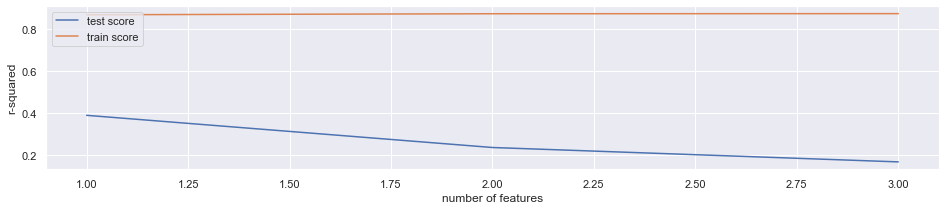

In [259]:
# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [260]:
# k-fold CV (using all the  variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores.mean()

0.1789140802242774

# GRID CV

In [261]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

0.23265749987529014
0.22983061965917898


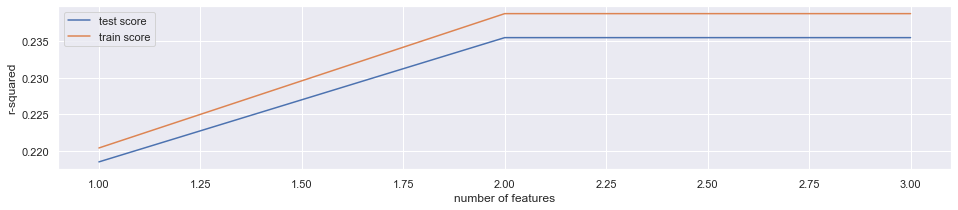

In [262]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
lm_cv_train=cv_results['mean_train_score'].mean()
lm_cv_test=cv_results['mean_test_score'].mean()
print(lm_cv_train)
print(lm_cv_test)

# plotting cv results
plt.figure(figsize=(16,3))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [263]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 4))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rf =RandomForestRegressor()
lm.fit(X_train, y_train)
rf.fit(X_train, y_train)
rfe = RFE(rf)             
lre = RFE(lm)      
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [264]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

#Store the average scores in a variable for comparisions
rf_cv_train=cv_results['mean_train_score'].mean()
rf_cv_test=cv_results['mean_test_score'].mean()
print(rf_cv_train)
print(rf_cv_test)

0.4776347888469075
0.14206021049325865


# Decision Tree

In [265]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


#-----
#parameters = {
#    'n_estimators': [100, 150, 200, 250, 300],
#    'max_depth': [1,2,3,4],
#}
#regr = RandomForestRegressor(random_state=0)
#
#clf = GridSearchCV(regr, parameters)
#clf.fit(X_train, y_train)
#----

# step-3: perform grid search
# 3.1 specify model
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
rfe = RFE(tree)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [266]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['rank_test_score','param_n_features_to_select','mean_train_score','mean_test_score']]

,rank_test_score,param_n_features_to_select,mean_train_score,mean_test_score
0,1,1,0.266504,0.233701
1,4,2,0.553027,0.056297
2,5,3,0.553027,0.054901
3,2,4,0.553027,0.057609
4,3,5,0.553027,0.056741


In [267]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor


# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 500, 
                               criterion = 'mse', 
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_estimators=500, n_jobs=-1,
                      random_state=1)

# GRID CV

In [268]:
#Predictions
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
y_train_pred


array([14.32179395, 14.32179395,  6.9098381 , ..., 17.99801338,
       16.60426257, 20.04664799])

In [269]:
# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R2_RF_train=r2_score(y_train, y_train_pred)
R2_RF_test=r2_score(y_test,y_test_pred)

R^2 train: 0.492, test: -0.064


In [270]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [271]:
y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


22.75904201171378

In [272]:


parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)


In [273]:

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
mean_squared_error(y_train, y_pred_train)


22.75904201171378

# Booster Algorithm

In [293]:
model = lgb.LGBMRegressor(random_state=42,max_depth=100)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20)

[20]	training's l2: 240.764	valid_0's l2: 472.095
[40]	training's l2: 188.71	valid_0's l2: 476.283
[60]	training's l2: 159.231	valid_0's l2: 510.701
[80]	training's l2: 137.691	valid_0's l2: 542.33
[100]	training's l2: 121.648	valid_0's l2: 577.624


LGBMRegressor(max_depth=100, random_state=42)

In [294]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.8815
Testing accuracy -0.5053


# Network

In [391]:
# Create X and y objects
X = df_timeseriesPD[['Counts_l1','Counts_l2']].values
y = df_timeseriesPD['Counts'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  shuffle = False)


In [409]:
from keras import Sequential
from keras.layers import Dense
from keras import models

def build_regressor():
    regressor = models.Sequential()
    regressor.add(Dense(units=32, input_shape=(X_train.shape[1],),activation='relu'))
    regressor.add(Dense(units=32, activation='relu'))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse'])
    return regressor

In [410]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=1000,epochs=500)

In [411]:
results=regressor.fit(X_train,y_train)

Epoch 1/500
3/3 [==============================] - 0s 3ms/step - loss: 579.1357 - mse: 579.1357
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 518.3569 - mse: 518.3569
Epoch 3/500
3/3 [==============================] - 0s 2ms/step - loss: 461.8676 - mse: 461.8676
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 411.1806 - mse: 411.1806
Epoch 5/500
3/3 [==============================] - 0s 5ms/step - loss: 366.0492 - mse: 366.0492
Epoch 6/500
3/3 [==============================] - 0s 2ms/step - loss: 325.2121 - mse: 325.2121
Epoch 7/500
3/3 [==============================] - 0s 3ms/step - loss: 289.4540 - mse: 289.4540
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 257.8225 - mse: 257.8225
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 228.6635 - mse: 228.6635
Epoch 10/500
3/3 [==============================] - 0s 3ms/step - loss: 202.2968 - mse: 202.2968
Epoch 11/500
3/3 [=====================

3/3 [==============================] - 0s 3ms/step - loss: 35.3798 - mse: 35.3798
Epoch 88/500
3/3 [==============================] - 0s 3ms/step - loss: 35.3677 - mse: 35.3677
Epoch 89/500
3/3 [==============================] - 0s 5ms/step - loss: 35.3583 - mse: 35.3583
Epoch 90/500
3/3 [==============================] - 0s 3ms/step - loss: 35.3467 - mse: 35.3467
Epoch 91/500
3/3 [==============================] - 0s 2ms/step - loss: 35.3383 - mse: 35.3383
Epoch 92/500
3/3 [==============================] - 0s 5ms/step - loss: 35.3257 - mse: 35.3257
Epoch 93/500
3/3 [==============================] - 0s 3ms/step - loss: 35.3160 - mse: 35.3160
Epoch 94/500
3/3 [==============================] - 0s 3ms/step - loss: 35.3070 - mse: 35.3070
Epoch 95/500
3/3 [==============================] - 0s 2ms/step - loss: 35.2953 - mse: 35.2953
Epoch 96/500
3/3 [==============================] - 0s 5ms/step - loss: 35.2840 - mse: 35.2840
Epoch 97/500
3/3 [==============================] - 0s 3ms/step

3/3 [==============================] - 0s 2ms/step - loss: 33.5631 - mse: 33.5631
Epoch 173/500
3/3 [==============================] - 0s 3ms/step - loss: 33.5447 - mse: 33.5447
Epoch 174/500
3/3 [==============================] - 0s 2ms/step - loss: 33.4909 - mse: 33.4909
Epoch 175/500
3/3 [==============================] - 0s 3ms/step - loss: 33.4546 - mse: 33.4546
Epoch 176/500
3/3 [==============================] - 0s 3ms/step - loss: 33.4078 - mse: 33.4078
Epoch 177/500
3/3 [==============================] - 0s 2ms/step - loss: 33.3603 - mse: 33.3603
Epoch 178/500
3/3 [==============================] - 0s 2ms/step - loss: 33.3330 - mse: 33.3330
Epoch 179/500
3/3 [==============================] - 0s 4ms/step - loss: 33.2739 - mse: 33.2739
Epoch 180/500
3/3 [==============================] - 0s 3ms/step - loss: 33.2400 - mse: 33.2400
Epoch 181/500
3/3 [==============================] - 0s 2ms/step - loss: 33.1891 - mse: 33.1891
Epoch 182/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 29.8139 - mse: 29.8139
Epoch 258/500
3/3 [==============================] - 0s 3ms/step - loss: 29.7800 - mse: 29.7800
Epoch 259/500
3/3 [==============================] - 0s 3ms/step - loss: 29.7530 - mse: 29.7530
Epoch 260/500
3/3 [==============================] - 0s 2ms/step - loss: 29.7126 - mse: 29.7126
Epoch 261/500
3/3 [==============================] - 0s 3ms/step - loss: 29.7160 - mse: 29.7160
Epoch 262/500
3/3 [==============================] - 0s 4ms/step - loss: 29.6567 - mse: 29.6567
Epoch 263/500
3/3 [==============================] - 0s 2ms/step - loss: 29.6519 - mse: 29.6519
Epoch 264/500
3/3 [==============================] - 0s 2ms/step - loss: 29.6293 - mse: 29.6293
Epoch 265/500
3/3 [==============================] - 0s 3ms/step - loss: 29.5857 - mse: 29.5857
Epoch 266/500
3/3 [==============================] - 0s 5ms/step - loss: 29.5930 - mse: 29.5930
Epoch 267/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 28.8960 - mse: 28.8960
Epoch 343/500
3/3 [==============================] - 0s 4ms/step - loss: 28.8631 - mse: 28.8631
Epoch 344/500
3/3 [==============================] - 0s 2ms/step - loss: 28.8423 - mse: 28.8423
Epoch 345/500
3/3 [==============================] - 0s 5ms/step - loss: 28.8941 - mse: 28.8941
Epoch 346/500
3/3 [==============================] - 0s 3ms/step - loss: 28.8333 - mse: 28.8333
Epoch 347/500
3/3 [==============================] - 0s 2ms/step - loss: 28.9146 - mse: 28.9146
Epoch 348/500
3/3 [==============================] - 0s 3ms/step - loss: 28.8471 - mse: 28.8471
Epoch 349/500
3/3 [==============================] - 0s 3ms/step - loss: 28.8906 - mse: 28.8906
Epoch 350/500
3/3 [==============================] - 0s 5ms/step - loss: 28.8052 - mse: 28.8052
Epoch 351/500
3/3 [==============================] - 0s 2ms/step - loss: 28.8770 - mse: 28.8770
Epoch 352/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 3ms/step - loss: 28.6588 - mse: 28.6588
Epoch 428/500
3/3 [==============================] - 0s 4ms/step - loss: 28.6744 - mse: 28.6744
Epoch 429/500
3/3 [==============================] - 0s 2ms/step - loss: 28.6571 - mse: 28.6571
Epoch 430/500
3/3 [==============================] - 0s 4ms/step - loss: 28.6601 - mse: 28.6601
Epoch 431/500
3/3 [==============================] - 0s 3ms/step - loss: 28.6464 - mse: 28.6464
Epoch 432/500
3/3 [==============================] - 0s 3ms/step - loss: 28.6445 - mse: 28.6445
Epoch 433/500
3/3 [==============================] - 0s 4ms/step - loss: 28.6456 - mse: 28.6456
Epoch 434/500
3/3 [==============================] - 0s 2ms/step - loss: 28.6441 - mse: 28.6441
Epoch 435/500
3/3 [==============================] - 0s 5ms/step - loss: 28.6375 - mse: 28.6375
Epoch 436/500
3/3 [==============================] - 0s 3ms/step - loss: 28.6425 - mse: 28.6425
Epoch 437/500
3/3 [==============================] - 0

In [412]:
y_pred= regressor.predict(X_test)

1/1 [==============================] - 0s 56ms/step


In [413]:
from sklearn.metrics import r2_score
# Store the R2 error into train_r2 and test_r2

#Prediction
train_fcst = regressor.predict(X_train)
test_fcst = regressor.predict(X_test)

train_r2_4 = r2_score(y_train, train_fcst)
test_r2_4 = r2_score(y_test, test_fcst)
print(train_r2_4,test_r2_4)

1/1 [==============================] - 0s 20ms/step
0.13633319516018805 -0.07106372609082068


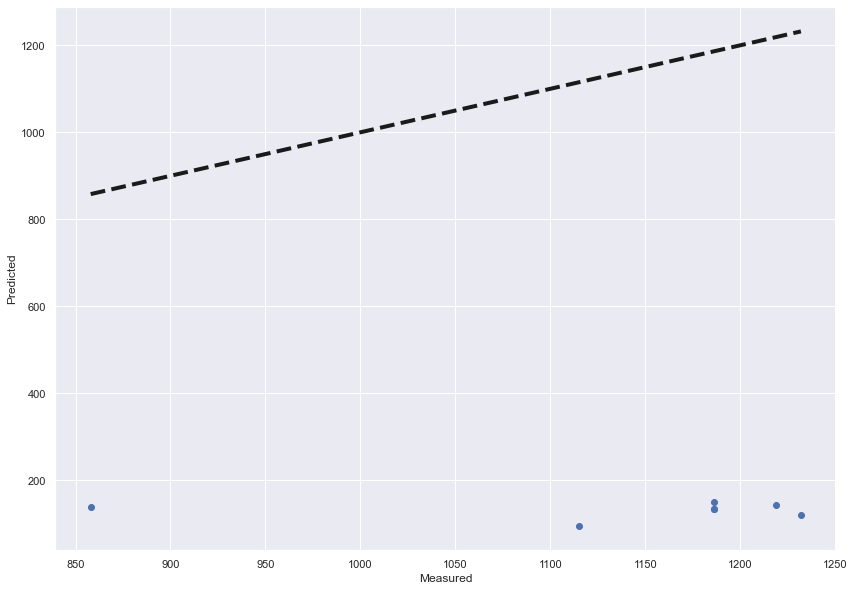

In [337]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Training data Accuracy :  0.9133038481057785
Testing data  Accuracy :  -0.21901432434406054


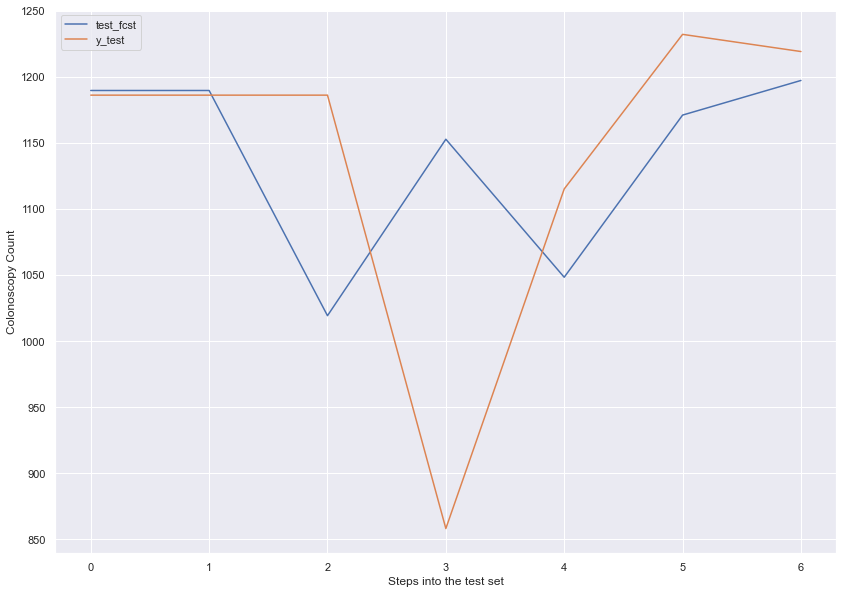

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit Linear Regression model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Assign variable for plotting later on
lr_train_r2=train_r2
lr_test_r2=test_r2
# Display the training and test score
print("Training data Accuracy : ",train_r2)
print("Testing data  Accuracy : ",test_r2)
# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
#plt.title('Test_Fcst vs test data',fontsize=14)
plt.xlabel('Steps into the test set')
plt.ylabel('Colonoscopy Count')
plt.legend(['test_fcst', 'y_test'], loc='upper left')

plt.show()

In [339]:
#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2_lr = r2_score(y_train, train_fcst)
test_r2_lr = r2_score(y_test, test_fcst)
print(train_r2_lr,test_r2_4)

0.9133038481057785 -70.44763511478412


[Text(0.5, 1.0, 'Daily colonoscopy Distribution')]

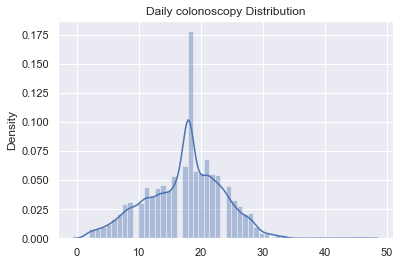

In [437]:
#Plotting a histogram
sns.distplot(df_timeseriesPD,bins=50).set(title="Daily colonoscopy Distribution")

In [424]:
# Create X and y objects
X = df_timeseriesPD[['Counts_l1','Counts_l2','Counts_l3','Counts_l4']].values
y = df_timeseriesPD['Counts'].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  shuffle = False)


In [434]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=10,
                         activation="relu",
                         input_shape=(X_train.shape[1],)))

# Add fully connected layer with a ReLU activation function
#network.add(layers.Dense(units=10, activation="relu"))
network.add(layers.Dense(units=10, activation="relu"))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

In [435]:
# Compile neural network
network.compile(loss="mse", # Mean squared error
                optimizer="adam", # Optimization algorithm
                metrics=["mse"]) # Mean squared error

# Train neural network
history = network.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=2000, # Number of epochs
                      verbose=0, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Test data

# Predict classes of test set
predicted_target = network.predict(X_test)

#print(predicted_target)

scores = network.evaluate(X_train, y_train)
print((scores[1]))

scores = network.evaluate(X_test, y_test)
print(  (scores[1] ))

83/83 [==============================] - 0s 1ms/step - loss: 22.6694 - mse: 22.6694
22.669374465942383
21/21 [==============================] - 0s 1ms/step - loss: 50.3834 - mse: 50.3834
50.383419036865234


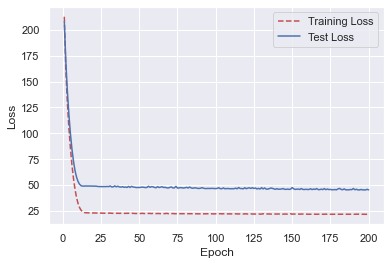

In [398]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

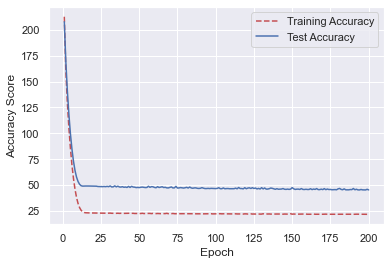

In [400]:
# Get training and test accuracy histories
training_accuracy = history.history["mse"]
test_accuracy = history.history["val_mse"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [ ]:
#Prediction
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2_lr = r2_score(y_train, train_fcst)
test_r2_lr = r2_score(y_test, test_fcst)
print(train_r2_lr,test_r2_4)